In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing CSV File.

In [2]:
# I have given the path between the single quotes(below) you can change it accordingly.

df = pd.read_csv('G:/DOCUMENTS/Airlinewise Monthly International Air Traffic To And From The Indian Territory.csv')

### Renaming Columns.

In [3]:
# Changing column's name 'CARRIER TYPE' to 'CARRIER_TYPE'(below) and others as mentioned below and showing top 10 rows.

df = df.rename({'CARRIER TYPE':'CARRIER_TYPE','AIRLINE NAME':'AIRLINE_NAME','PASSENGERS TO INDIA':'PASSENGERS_TO_INDIA', 'PASSENGERS FROM INDIA':'PASSENGERS_FROM_INDIA'}, axis='columns')
df.head(10)

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680
5,2015,JAN,Q1,AEROFLOT,FOREIGN,5088.0,6901,7.581,199.696
6,2015,JAN,Q1,AEROLOGIC,FOREIGN,0.0,0,1.409,1.235
7,2015,JAN,Q1,AIR ARABIA,FOREIGN,77405.0,79096,191.549,1096.201
8,2015,JAN,Q1,AIR ASIA BERHAD,FOREIGN,25906.0,27950,33.524,307.431
9,2015,JAN,Q1,AIR AUSTRAL,FOREIGN,0.0,0,0.000,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   2334 non-null   int64  
 1   MONTH                  2334 non-null   object 
 2   QUARTER                2334 non-null   object 
 3   AIRLINE_NAME           2334 non-null   object 
 4   CARRIER_TYPE           2334 non-null   object 
 5   PASSENGERS_TO_INDIA    2333 non-null   float64
 6   PASSENGERS_FROM_INDIA  2334 non-null   int64  
 7   FREIGHT TO INDIA       2334 non-null   float64
 8   FREIGHT FROM INDIA     2334 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 164.2+ KB


### Making a new column.

In [5]:
df['Total_Passengers'] = df.iloc[:, 5:7].sum(axis=1)
df.head()

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,533096.0
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,212181.0
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,142324.0
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,652969.0
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,80350.0


In [6]:
df['Total_Freight/Goods'] = df.iloc[:, 7:9].sum(axis=1)
df.head()

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers,Total_Freight/Goods
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,533096.0,7506.928
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,212181.0,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,142324.0,2132.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,652969.0,9557.389
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,80350.0,115.680


### Grouping by Years.

In [7]:
df.groupby('YEAR').sum()

,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers,Total_Freight/Goods
YEAR,,,,,,
2015,23781640.0,24858956,560737.27196,887775.4163,48640596.0,1.448513e+06
2016,26543689.0,27122472,570518.70000,893202.2000,53666161.0,1.463721e+06
2017,6778304.0,7424671,154621.10000,238545.9000,14202975.0,3.931670e+05


## Comparison between Passengers from India & Passengers to India over Years.

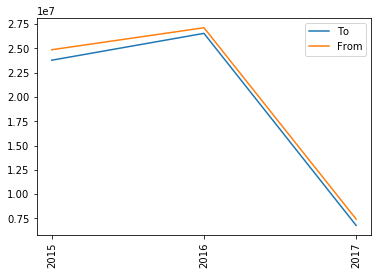

In [8]:
results = df.groupby('YEAR').sum()

# Making a range 2015 to 2018 with increment of 1.
year = np.arange(2015,2018)

plt.plot(year, results['PASSENGERS_TO_INDIA'], label = 'To')

# Fixing the scale of x-axis and rotating the scale values.
plt.xticks(np.arange(2015,2018), rotation='vertical')

plt.plot(year, results['PASSENGERS_FROM_INDIA'], label = 'From')
plt.legend()
plt.show()

### Grouping by Airline Name.

In [9]:
df1 = df.groupby('AIRLINE_NAME').sum()
df1.head()

,YEAR,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers,Total_Freight/Goods
AIRLINE_NAME,,,,,,,
AEROFLOT,54423,194356.0,210052,526.952,5425.072,404408.0,5952.024
AEROLOGIC,54423,0.0,0,71.486,549.440,0.0,620.926
AIR ARABIA,54423,1964928.0,2031394,2996.604,29382.071,3996322.0,32378.675
AIR ASIA BERHAD,54423,735850.0,717993,1412.979,8481.998,1453843.0,9894.977
AIR ASIA X,30243,66188.0,69238,2302.500,2863.400,135426.0,5165.900


## Which are the top 10 Air Lines that are mostly used?

### Sorting in Descending order.

In [10]:
df1 = df1.sort_values('Total_Passengers',ascending=False).head(10)
df1

,YEAR,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers,Total_Freight/Goods
AIRLINE_NAME,,,,,,,
JET AIRWAYS,54423,8320544.0,8471096,116453.19897,169026.80005,16791640.0,285479.99902
AIR INDIA,54423,6417414.0,6495056,101273.51800,137342.86200,12912470.0,238616.38000
EMIRATES AIRLINE,54423,5981862.0,6214850,140917.98000,347591.80500,12196712.0,488509.78500
AIR INDIA EXPRESS,54423,3099689.0,3433720,1543.66900,11700.50500,6533409.0,13244.17400
ETIHAD AIRLINES,54423,2715962.0,2813097,31049.13500,107152.41300,5529059.0,138201.54800
AIR ARABIA,54423,1964928.0,2031394,2996.60400,29382.07100,3996322.0,32378.67500
INDIGO,54423,1929303.0,2044693,3153.10150,27603.31154,3973996.0,30756.41304
OMAN AIR,54423,1758656.0,1802529,3307.29800,26280.23600,3561185.0,29587.53400
QATAR AIRWAYS,36288,1654189.0,1646102,83338.97300,147365.34700,3300291.0,230704.32000


In [11]:
df1

,YEAR,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers,Total_Freight/Goods
AIRLINE_NAME,,,,,,,
JET AIRWAYS,54423,8320544.0,8471096,116453.19897,169026.80005,16791640.0,285479.99902
AIR INDIA,54423,6417414.0,6495056,101273.51800,137342.86200,12912470.0,238616.38000
EMIRATES AIRLINE,54423,5981862.0,6214850,140917.98000,347591.80500,12196712.0,488509.78500
AIR INDIA EXPRESS,54423,3099689.0,3433720,1543.66900,11700.50500,6533409.0,13244.17400
ETIHAD AIRLINES,54423,2715962.0,2813097,31049.13500,107152.41300,5529059.0,138201.54800
AIR ARABIA,54423,1964928.0,2031394,2996.60400,29382.07100,3996322.0,32378.67500
INDIGO,54423,1929303.0,2044693,3153.10150,27603.31154,3973996.0,30756.41304
OMAN AIR,54423,1758656.0,1802529,3307.29800,26280.23600,3561185.0,29587.53400
QATAR AIRWAYS,36288,1654189.0,1646102,83338.97300,147365.34700,3300291.0,230704.32000


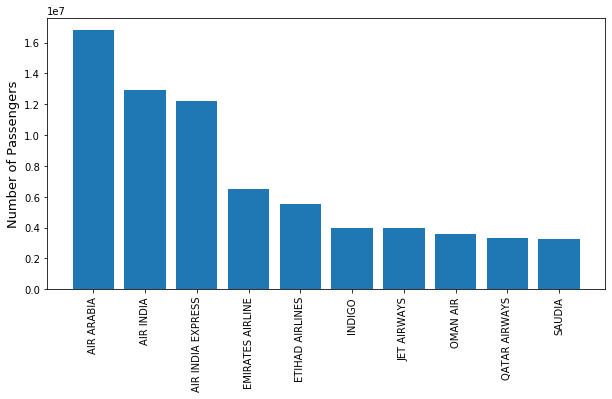

In [12]:
# Making a list of name of Airlines present in df1 and storing them in 'AirlineName'.
AirlineName = [AIRLINE_NAME for AIRLINE_NAME, df2 in df1.groupby('AIRLINE_NAME')]

plt.figure(figsize=(10,5))

plt.bar(AirlineName, df1['Total_Passengers'])

plt.ylabel("Number of Passengers", size=13)

plt.xticks(rotation='vertical')

plt.show()

## Passengers From India vs To India according to Air Lines.

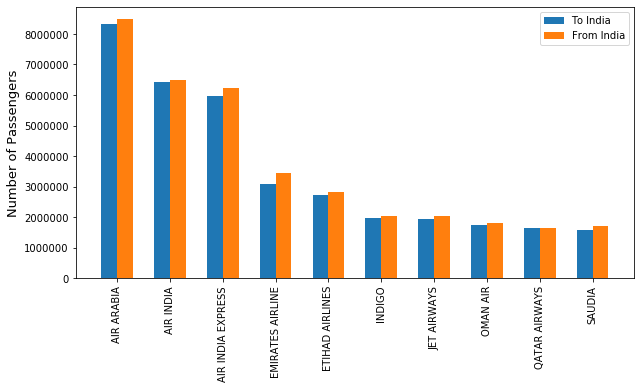

In [13]:
N = 10
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, df1['PASSENGERS_TO_INDIA'],width, label='To India')
plt.bar(ind+width, df1['PASSENGERS_FROM_INDIA'],width, label='From India')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, AirlineName, rotation = 'vertical')
plt.legend()

plt.show()

### Grouping by Carrier Type.

In [14]:
df2 = df.groupby('CARRIER_TYPE').sum()
df2.head()

,YEAR,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers,Total_Freight/Goods
CARRIER_TYPE,,,,,,,
DOMESTIC,272115,21305053.0,22065392,2.241534e+05,3.551726e+05,43370445.0,5.793260e+05
FOREIGN,4432527,35798580.0,37340707,1.061724e+06,1.664351e+06,73139287.0,2.726075e+06


## Which type of flights are mostly used?(Domestic or Foreign)

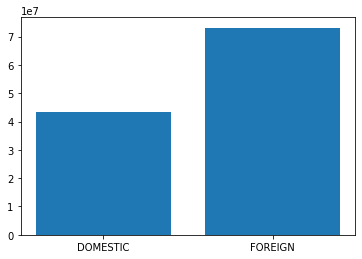

In [15]:
# Making a list of carrier types and storing them in 'CarrierType'.
CarrierType = [CARRIER_TYPE for CARRIER_TYPE, df3 in df2.groupby('CARRIER_TYPE')]

plt.bar(CarrierType, df2['Total_Passengers'])
plt.show()

### Grouping by Quarter.

In [16]:
df3 = df.groupby('QUARTER').sum()
df3.head()

,YEAR,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers,Total_Freight/Goods
QUARTER,,,,,,,
Q1,1596708,18834064.0,20672324,415228.75570,668144.74750,39506388.0,1.083374e+06
Q2,1015824,12398212.0,13052124,275914.40936,446150.52842,25450336.0,7.220649e+05
Q3,1021869,12226961.0,12867001,296275.44776,425094.38712,25093962.0,7.213698e+05
Q4,1070241,13644396.0,12814650,298458.45914,480133.85326,26459046.0,7.785923e+05


## Which Quarter of the Year Airplanes are mostly used?

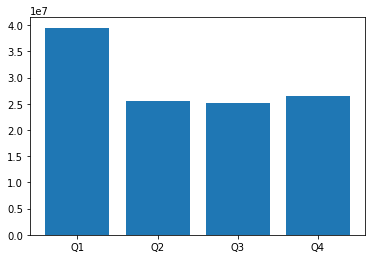

In [17]:
quarter = np.array(['Q1','Q2','Q3','Q4'])

plt.bar(quarter, df3['Total_Passengers'])
plt.show()

## Comparison between No. of Passengers in different months of 2015.

In [18]:
grpYearMonth = df.groupby(['YEAR', 'MONTH']).sum()
grpYearMonth

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  FREIGHT TO INDIA  \
YEAR MONTH                                                                 
2015 APR              1779369.0                2138120       44996.78955   
     AUG              1815667.0                2260718       56823.41702   
     DEC              2341871.0                2186996       46745.50798   
     FEB              1764380.0                1982268       40590.82900   
     JAN              2079662.0                2236061       39561.87300   
     JUL              2178194.0                1793448       46769.79854   
     JUN              2064960.0                1904483       45391.09253   
     MAR              1868188.0                2158036       46228.85370   
     MAY              2032635.0                2233776       48352.42728   
     NOV              2096937.0                1943196       43958.21545   
     OCT              2042536.0                2011537       54270.73571   
     SEP              1717241.0                2010317       47047.73220   
2016 APR              1959340.0                2375183       45922.00000   
     AUG              2067689.0                2424063       47419.10000   
     DEC              2638204.0                2383572       51122.30000   
     FEB              1973688.0                2123380       41089.20000   
     JAN              2263352.0                2421968       43765.60000   
     JUL              2475137.0                2081707       48473.00000   
     JUN              2355296.0                1962625       45061.70000   
     MAR              2106490.0                2325940       49371.30000   
     MAY              2206612.0                2437937       46190.40000   
     NOV              2324759.0                2194642       49964.80000   
     OCT              2200089.0                2094707       52396.90000   
     SEP              1973033.0                2296748       49742.40000   
2017 FEB              2065487.0                2322833       45059.50000   
     JAN              2479129.0                2602815       49208.80000   
     MAR              2233688.0                2499023       60352.80000   

            FREIGHT FROM INDIA  Total_Passengers  Total_Freight/Goods  
YEAR MONTH                                                             
2015 APR           69767.42776         3917489.0         114764.21731  
     AUG           68385.57020         4076385.0         125208.98722  
     DEC          110252.47215         4528867.0         156997.98013  
     FEB           65478.42300         3746648.0         106069.25200  
     JAN           72763.17900         4315723.0         112325.05200  
     JUL           71087.63352         3971642.0         117857.43206  
     JUN           71952.19437         3969443.0         117343.28690  
     MAR           75520.94550         4026224.0         121749.79920  
     MAY           72994.30629         4266411.0         121346.73357  
     NOV           62025.05838         4040133.0         105983.27383  
     OCT           81603.12273         4054073.0         135873.85844  
     SEP           65945.08340         3727558.0         112992.81560  
2016 APR           75218.50000         4334523.0         121140.50000  
     AUG           73907.40000         4491752.0         121326.50000  
     DEC           73356.40000         5021776.0         124478.70000  
     FEB           68938.40000         4097068.0         110027.60000  
     JAN           66392.60000         4685320.0         110158.20000  
     JUL           73268.60000         4556844.0         121741.60000  
     JUN           78705.70000         4317921.0         123767.40000  
     MAR           80505.30000         4432430.0         129876.60000  
     MAY           77512.40000         4644549.0         123702.80000  
     NOV           71950.70000         4519401.0         121915.50000  
     OCT           80946.10000         4294796.0         133343.00000  
     SE

In [19]:
listYearMonth2015 = grpYearMonth['Total_Passengers'].take(np.arange(0,12))
listYearMonth2015

YEAR  MONTH
2015  APR      3917489.0
      AUG      4076385.0
      DEC      4528867.0
      FEB      3746648.0
      JAN      4315723.0
      JUL      3971642.0
      JUN      3969443.0
      MAR      4026224.0
      MAY      4266411.0
      NOV      4040133.0
      OCT      4054073.0
      SEP      3727558.0
Name: Total_Passengers, dtype: float64

In [20]:
months = [month for month, df3 in grpYearMonth.groupby('MONTH')]
months

['APR',
 'AUG',
 'DEC',
 'FEB',
 'JAN',
 'JUL',
 'JUN',
 'MAR',
 'MAY',
 'NOV',
 'OCT',
 'SEP']

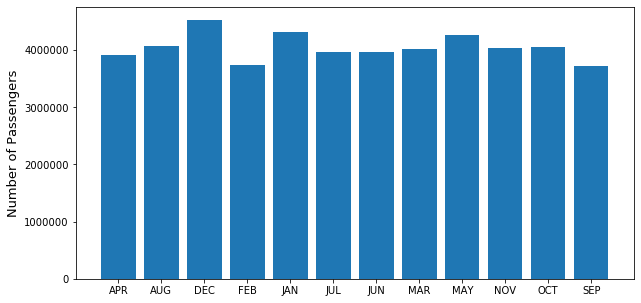

In [21]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2015)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers in different months of 2016.

In [22]:
listYearMonth2016 = grpYearMonth['Total_Passengers'].take(np.arange(12,24))
listYearMonth2016

YEAR  MONTH
2016  APR      4334523.0
      AUG      4491752.0
      DEC      5021776.0
      FEB      4097068.0
      JAN      4685320.0
      JUL      4556844.0
      JUN      4317921.0
      MAR      4432430.0
      MAY      4644549.0
      NOV      4519401.0
      OCT      4294796.0
      SEP      4269781.0
Name: Total_Passengers, dtype: float64

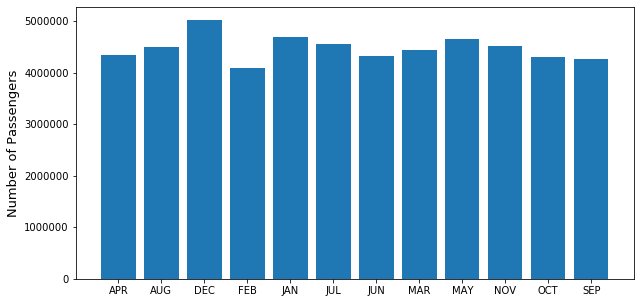

In [23]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2016)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers in different months of 2015 & 2016.

In [24]:
df.head()

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers,Total_Freight/Goods
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,533096.0,7506.928
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,212181.0,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,142324.0,2132.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,652969.0,9557.389
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,80350.0,115.680


In [25]:
grpYearMonth

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  FREIGHT TO INDIA  \
YEAR MONTH                                                                 
2015 APR              1779369.0                2138120       44996.78955   
     AUG              1815667.0                2260718       56823.41702   
     DEC              2341871.0                2186996       46745.50798   
     FEB              1764380.0                1982268       40590.82900   
     JAN              2079662.0                2236061       39561.87300   
     JUL              2178194.0                1793448       46769.79854   
     JUN              2064960.0                1904483       45391.09253   
     MAR              1868188.0                2158036       46228.85370   
     MAY              2032635.0                2233776       48352.42728   
     NOV              2096937.0                1943196       43958.21545   
     OCT              2042536.0                2011537       54270.73571   
     SEP              1717241.0                2010317       47047.73220   
2016 APR              1959340.0                2375183       45922.00000   
     AUG              2067689.0                2424063       47419.10000   
     DEC              2638204.0                2383572       51122.30000   
     FEB              1973688.0                2123380       41089.20000   
     JAN              2263352.0                2421968       43765.60000   
     JUL              2475137.0                2081707       48473.00000   
     JUN              2355296.0                1962625       45061.70000   
     MAR              2106490.0                2325940       49371.30000   
     MAY              2206612.0                2437937       46190.40000   
     NOV              2324759.0                2194642       49964.80000   
     OCT              2200089.0                2094707       52396.90000   
     SEP              1973033.0                2296748       49742.40000   
2017 FEB              2065487.0                2322833       45059.50000   
     JAN              2479129.0                2602815       49208.80000   
     MAR              2233688.0                2499023       60352.80000   

            FREIGHT FROM INDIA  Total_Passengers  Total_Freight/Goods  
YEAR MONTH                                                             
2015 APR           69767.42776         3917489.0         114764.21731  
     AUG           68385.57020         4076385.0         125208.98722  
     DEC          110252.47215         4528867.0         156997.98013  
     FEB           65478.42300         3746648.0         106069.25200  
     JAN           72763.17900         4315723.0         112325.05200  
     JUL           71087.63352         3971642.0         117857.43206  
     JUN           71952.19437         3969443.0         117343.28690  
     MAR           75520.94550         4026224.0         121749.79920  
     MAY           72994.30629         4266411.0         121346.73357  
     NOV           62025.05838         4040133.0         105983.27383  
     OCT           81603.12273         4054073.0         135873.85844  
     SEP           65945.08340         3727558.0         112992.81560  
2016 APR           75218.50000         4334523.0         121140.50000  
     AUG           73907.40000         4491752.0         121326.50000  
     DEC           73356.40000         5021776.0         124478.70000  
     FEB           68938.40000         4097068.0         110027.60000  
     JAN           66392.60000         4685320.0         110158.20000  
     JUL           73268.60000         4556844.0         121741.60000  
     JUN           78705.70000         4317921.0         123767.40000  
     MAR           80505.30000         4432430.0         129876.60000  
     MAY           77512.40000         4644549.0         123702.80000  
     NOV           71950.70000         4519401.0         121915.50000  
     OCT           80946.10000         4294796.0         133343.00000  
     SE

In [26]:
listYearMonth2015

YEAR  MONTH
2015  APR      3917489.0
      AUG      4076385.0
      DEC      4528867.0
      FEB      3746648.0
      JAN      4315723.0
      JUL      3971642.0
      JUN      3969443.0
      MAR      4026224.0
      MAY      4266411.0
      NOV      4040133.0
      OCT      4054073.0
      SEP      3727558.0
Name: Total_Passengers, dtype: float64

In [27]:
listYearMonth2016

YEAR  MONTH
2016  APR      4334523.0
      AUG      4491752.0
      DEC      5021776.0
      FEB      4097068.0
      JAN      4685320.0
      JUL      4556844.0
      JUN      4317921.0
      MAR      4432430.0
      MAY      4644549.0
      NOV      4519401.0
      OCT      4294796.0
      SEP      4269781.0
Name: Total_Passengers, dtype: float64

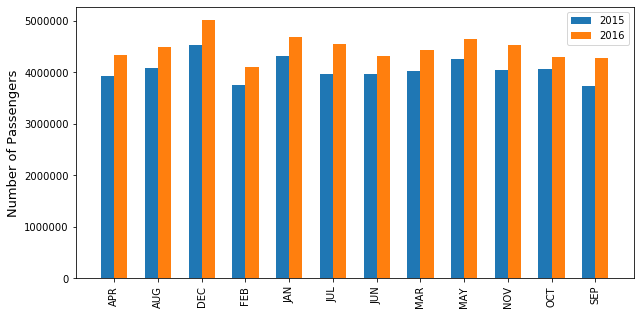

In [28]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonth2015,width, label='2015')
plt.bar(ind+width, listYearMonth2016,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, months, rotation = 'vertical')
plt.legend()

plt.show()

## Comparison between No. of Passengers coming to India in different months of 2015.

In [29]:
listYearMonth2015To = grpYearMonth['PASSENGERS_TO_INDIA'].take(np.arange(0,12))
listYearMonth2015To

YEAR  MONTH
2015  APR      1779369.0
      AUG      1815667.0
      DEC      2341871.0
      FEB      1764380.0
      JAN      2079662.0
      JUL      2178194.0
      JUN      2064960.0
      MAR      1868188.0
      MAY      2032635.0
      NOV      2096937.0
      OCT      2042536.0
      SEP      1717241.0
Name: PASSENGERS_TO_INDIA, dtype: float64

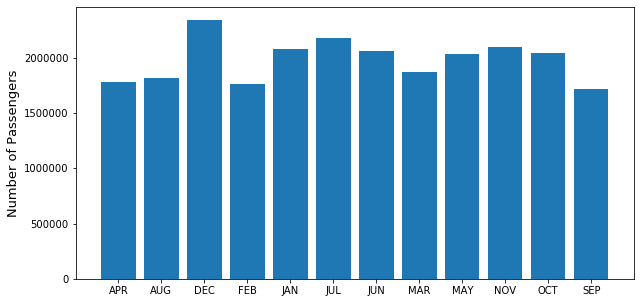

In [30]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2015To)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers coming to India in different months of 2016.

In [31]:
listYearMonth2016To = grpYearMonth['PASSENGERS_TO_INDIA'].take(np.arange(12,24))
listYearMonth2016To

YEAR  MONTH
2016  APR      1959340.0
      AUG      2067689.0
      DEC      2638204.0
      FEB      1973688.0
      JAN      2263352.0
      JUL      2475137.0
      JUN      2355296.0
      MAR      2106490.0
      MAY      2206612.0
      NOV      2324759.0
      OCT      2200089.0
      SEP      1973033.0
Name: PASSENGERS_TO_INDIA, dtype: float64

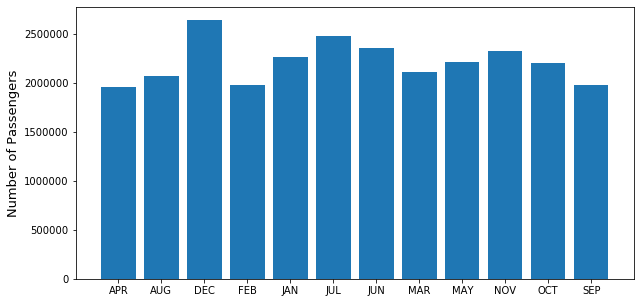

In [32]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2016To)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers coming to India in different months of 2015 & 2016.

In [33]:
grpYearMonth

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  FREIGHT TO INDIA  \
YEAR MONTH                                                                 
2015 APR              1779369.0                2138120       44996.78955   
     AUG              1815667.0                2260718       56823.41702   
     DEC              2341871.0                2186996       46745.50798   
     FEB              1764380.0                1982268       40590.82900   
     JAN              2079662.0                2236061       39561.87300   
     JUL              2178194.0                1793448       46769.79854   
     JUN              2064960.0                1904483       45391.09253   
     MAR              1868188.0                2158036       46228.85370   
     MAY              2032635.0                2233776       48352.42728   
     NOV              2096937.0                1943196       43958.21545   
     OCT              2042536.0                2011537       54270.73571   
     SEP              1717241.0                2010317       47047.73220   
2016 APR              1959340.0                2375183       45922.00000   
     AUG              2067689.0                2424063       47419.10000   
     DEC              2638204.0                2383572       51122.30000   
     FEB              1973688.0                2123380       41089.20000   
     JAN              2263352.0                2421968       43765.60000   
     JUL              2475137.0                2081707       48473.00000   
     JUN              2355296.0                1962625       45061.70000   
     MAR              2106490.0                2325940       49371.30000   
     MAY              2206612.0                2437937       46190.40000   
     NOV              2324759.0                2194642       49964.80000   
     OCT              2200089.0                2094707       52396.90000   
     SEP              1973033.0                2296748       49742.40000   
2017 FEB              2065487.0                2322833       45059.50000   
     JAN              2479129.0                2602815       49208.80000   
     MAR              2233688.0                2499023       60352.80000   

            FREIGHT FROM INDIA  Total_Passengers  Total_Freight/Goods  
YEAR MONTH                                                             
2015 APR           69767.42776         3917489.0         114764.21731  
     AUG           68385.57020         4076385.0         125208.98722  
     DEC          110252.47215         4528867.0         156997.98013  
     FEB           65478.42300         3746648.0         106069.25200  
     JAN           72763.17900         4315723.0         112325.05200  
     JUL           71087.63352         3971642.0         117857.43206  
     JUN           71952.19437         3969443.0         117343.28690  
     MAR           75520.94550         4026224.0         121749.79920  
     MAY           72994.30629         4266411.0         121346.73357  
     NOV           62025.05838         4040133.0         105983.27383  
     OCT           81603.12273         4054073.0         135873.85844  
     SEP           65945.08340         3727558.0         112992.81560  
2016 APR           75218.50000         4334523.0         121140.50000  
     AUG           73907.40000         4491752.0         121326.50000  
     DEC           73356.40000         5021776.0         124478.70000  
     FEB           68938.40000         4097068.0         110027.60000  
     JAN           66392.60000         4685320.0         110158.20000  
     JUL           73268.60000         4556844.0         121741.60000  
     JUN           78705.70000         4317921.0         123767.40000  
     MAR           80505.30000         4432430.0         129876.60000  
     MAY           77512.40000         4644549.0         123702.80000  
     NOV           71950.70000         4519401.0         121915.50000  
     OCT           80946.10000         4294796.0         133343.00000  
     SE

In [34]:
listYearMonth2015To

YEAR  MONTH
2015  APR      1779369.0
      AUG      1815667.0
      DEC      2341871.0
      FEB      1764380.0
      JAN      2079662.0
      JUL      2178194.0
      JUN      2064960.0
      MAR      1868188.0
      MAY      2032635.0
      NOV      2096937.0
      OCT      2042536.0
      SEP      1717241.0
Name: PASSENGERS_TO_INDIA, dtype: float64

In [35]:
listYearMonth2016To

YEAR  MONTH
2016  APR      1959340.0
      AUG      2067689.0
      DEC      2638204.0
      FEB      1973688.0
      JAN      2263352.0
      JUL      2475137.0
      JUN      2355296.0
      MAR      2106490.0
      MAY      2206612.0
      NOV      2324759.0
      OCT      2200089.0
      SEP      1973033.0
Name: PASSENGERS_TO_INDIA, dtype: float64

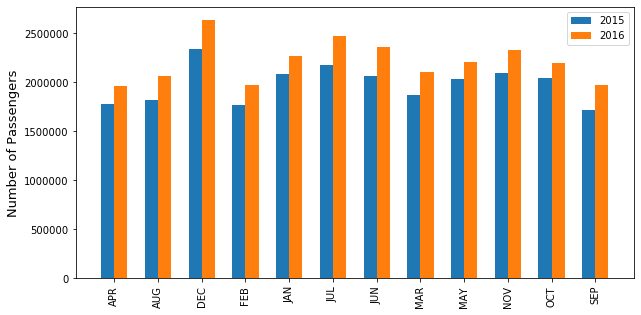

In [36]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonth2015To,width, label='2015')
plt.bar(ind+width, listYearMonth2016To,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, months, rotation = 'vertical')
plt.legend()

plt.show()

## Comparison between No. of Passengers going from India in different months of 2015.

In [37]:
listYearMonth2015From = grpYearMonth['PASSENGERS_FROM_INDIA'].take(np.arange(0,12))
listYearMonth2015From

YEAR  MONTH
2015  APR      2138120
      AUG      2260718
      DEC      2186996
      FEB      1982268
      JAN      2236061
      JUL      1793448
      JUN      1904483
      MAR      2158036
      MAY      2233776
      NOV      1943196
      OCT      2011537
      SEP      2010317
Name: PASSENGERS_FROM_INDIA, dtype: int64

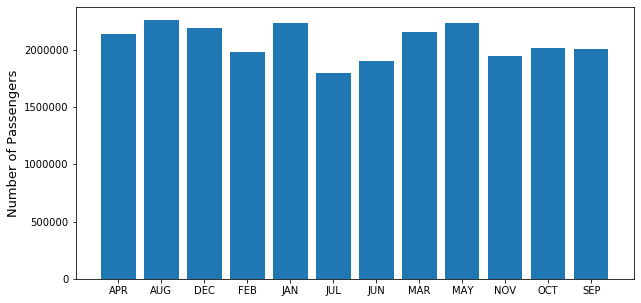

In [38]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2015From)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers going from India in different months of 2016.

In [39]:
listYearMonth2016From = grpYearMonth['PASSENGERS_FROM_INDIA'].take(np.arange(12,24))
listYearMonth2016From

YEAR  MONTH
2016  APR      2375183
      AUG      2424063
      DEC      2383572
      FEB      2123380
      JAN      2421968
      JUL      2081707
      JUN      1962625
      MAR      2325940
      MAY      2437937
      NOV      2194642
      OCT      2094707
      SEP      2296748
Name: PASSENGERS_FROM_INDIA, dtype: int64

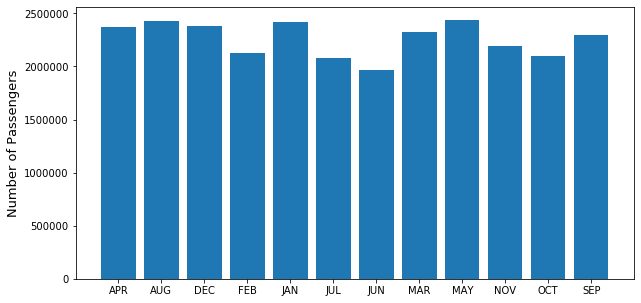

In [40]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2016From)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers going from India in different months of 2015 & 2016.

In [41]:
listYearMonth2015From

YEAR  MONTH
2015  APR      2138120
      AUG      2260718
      DEC      2186996
      FEB      1982268
      JAN      2236061
      JUL      1793448
      JUN      1904483
      MAR      2158036
      MAY      2233776
      NOV      1943196
      OCT      2011537
      SEP      2010317
Name: PASSENGERS_FROM_INDIA, dtype: int64

In [42]:
listYearMonth2016From

YEAR  MONTH
2016  APR      2375183
      AUG      2424063
      DEC      2383572
      FEB      2123380
      JAN      2421968
      JUL      2081707
      JUN      1962625
      MAR      2325940
      MAY      2437937
      NOV      2194642
      OCT      2094707
      SEP      2296748
Name: PASSENGERS_FROM_INDIA, dtype: int64

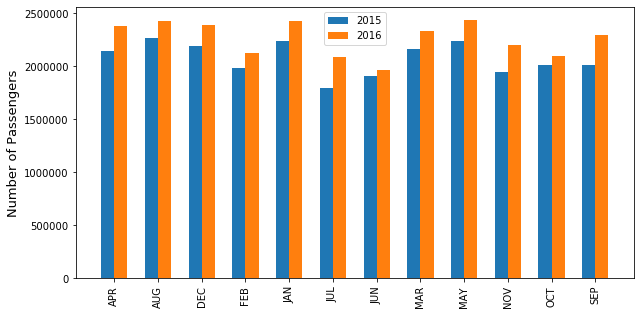

In [43]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonth2015From,width, label='2015')
plt.bar(ind+width, listYearMonth2016From,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, months, rotation = 'vertical')
plt.legend()

plt.show()

## Comparison b/w amount of goods transported in diff months of year 2015.

In [44]:
grpYearMonth

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  FREIGHT TO INDIA  \
YEAR MONTH                                                                 
2015 APR              1779369.0                2138120       44996.78955   
     AUG              1815667.0                2260718       56823.41702   
     DEC              2341871.0                2186996       46745.50798   
     FEB              1764380.0                1982268       40590.82900   
     JAN              2079662.0                2236061       39561.87300   
     JUL              2178194.0                1793448       46769.79854   
     JUN              2064960.0                1904483       45391.09253   
     MAR              1868188.0                2158036       46228.85370   
     MAY              2032635.0                2233776       48352.42728   
     NOV              2096937.0                1943196       43958.21545   
     OCT              2042536.0                2011537       54270.73571   
     SEP              1717241.0                2010317       47047.73220   
2016 APR              1959340.0                2375183       45922.00000   
     AUG              2067689.0                2424063       47419.10000   
     DEC              2638204.0                2383572       51122.30000   
     FEB              1973688.0                2123380       41089.20000   
     JAN              2263352.0                2421968       43765.60000   
     JUL              2475137.0                2081707       48473.00000   
     JUN              2355296.0                1962625       45061.70000   
     MAR              2106490.0                2325940       49371.30000   
     MAY              2206612.0                2437937       46190.40000   
     NOV              2324759.0                2194642       49964.80000   
     OCT              2200089.0                2094707       52396.90000   
     SEP              1973033.0                2296748       49742.40000   
2017 FEB              2065487.0                2322833       45059.50000   
     JAN              2479129.0                2602815       49208.80000   
     MAR              2233688.0                2499023       60352.80000   

            FREIGHT FROM INDIA  Total_Passengers  Total_Freight/Goods  
YEAR MONTH                                                             
2015 APR           69767.42776         3917489.0         114764.21731  
     AUG           68385.57020         4076385.0         125208.98722  
     DEC          110252.47215         4528867.0         156997.98013  
     FEB           65478.42300         3746648.0         106069.25200  
     JAN           72763.17900         4315723.0         112325.05200  
     JUL           71087.63352         3971642.0         117857.43206  
     JUN           71952.19437         3969443.0         117343.28690  
     MAR           75520.94550         4026224.0         121749.79920  
     MAY           72994.30629         4266411.0         121346.73357  
     NOV           62025.05838         4040133.0         105983.27383  
     OCT           81603.12273         4054073.0         135873.85844  
     SEP           65945.08340         3727558.0         112992.81560  
2016 APR           75218.50000         4334523.0         121140.50000  
     AUG           73907.40000         4491752.0         121326.50000  
     DEC           73356.40000         5021776.0         124478.70000  
     FEB           68938.40000         4097068.0         110027.60000  
     JAN           66392.60000         4685320.0         110158.20000  
     JUL           73268.60000         4556844.0         121741.60000  
     JUN           78705.70000         4317921.0         123767.40000  
     MAR           80505.30000         4432430.0         129876.60000  
     MAY           77512.40000         4644549.0         123702.80000  
     NOV           71950.70000         4519401.0         121915.50000  
     OCT           80946.10000         4294796.0         133343.00000  
     SE

In [45]:
listYearMonth2015G = grpYearMonth['Total_Freight/Goods'].take(np.arange(0,12))
listYearMonth2015G

YEAR  MONTH
2015  APR      114764.21731
      AUG      125208.98722
      DEC      156997.98013
      FEB      106069.25200
      JAN      112325.05200
      JUL      117857.43206
      JUN      117343.28690
      MAR      121749.79920
      MAY      121346.73357
      NOV      105983.27383
      OCT      135873.85844
      SEP      112992.81560
Name: Total_Freight/Goods, dtype: float64

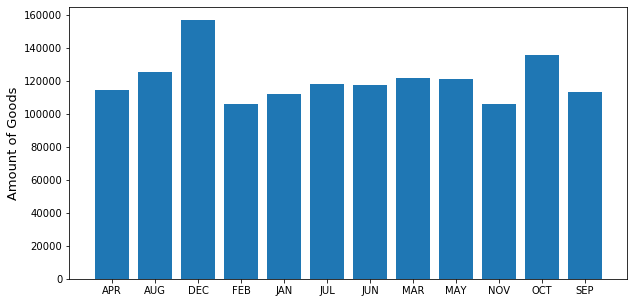

In [46]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2015G)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w amount of goods transported in diff months of year 2016.

In [47]:
listYearMonth2016G = grpYearMonth['Total_Freight/Goods'].take(np.arange(12,24))
listYearMonth2016G

YEAR  MONTH
2016  APR      121140.5
      AUG      121326.5
      DEC      124478.7
      FEB      110027.6
      JAN      110158.2
      JUL      121741.6
      JUN      123767.4
      MAR      129876.6
      MAY      123702.8
      NOV      121915.5
      OCT      133343.0
      SEP      122242.5
Name: Total_Freight/Goods, dtype: float64

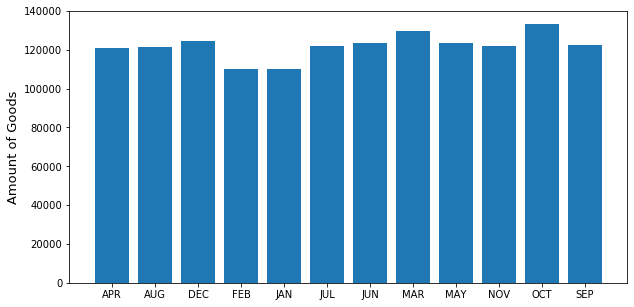

In [48]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2016G)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w amount of goods transported in diff months of years 2015 & 2016.

In [49]:
grpYearMonth

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  FREIGHT TO INDIA  \
YEAR MONTH                                                                 
2015 APR              1779369.0                2138120       44996.78955   
     AUG              1815667.0                2260718       56823.41702   
     DEC              2341871.0                2186996       46745.50798   
     FEB              1764380.0                1982268       40590.82900   
     JAN              2079662.0                2236061       39561.87300   
     JUL              2178194.0                1793448       46769.79854   
     JUN              2064960.0                1904483       45391.09253   
     MAR              1868188.0                2158036       46228.85370   
     MAY              2032635.0                2233776       48352.42728   
     NOV              2096937.0                1943196       43958.21545   
     OCT              2042536.0                2011537       54270.73571   
     SEP              1717241.0                2010317       47047.73220   
2016 APR              1959340.0                2375183       45922.00000   
     AUG              2067689.0                2424063       47419.10000   
     DEC              2638204.0                2383572       51122.30000   
     FEB              1973688.0                2123380       41089.20000   
     JAN              2263352.0                2421968       43765.60000   
     JUL              2475137.0                2081707       48473.00000   
     JUN              2355296.0                1962625       45061.70000   
     MAR              2106490.0                2325940       49371.30000   
     MAY              2206612.0                2437937       46190.40000   
     NOV              2324759.0                2194642       49964.80000   
     OCT              2200089.0                2094707       52396.90000   
     SEP              1973033.0                2296748       49742.40000   
2017 FEB              2065487.0                2322833       45059.50000   
     JAN              2479129.0                2602815       49208.80000   
     MAR              2233688.0                2499023       60352.80000   

            FREIGHT FROM INDIA  Total_Passengers  Total_Freight/Goods  
YEAR MONTH                                                             
2015 APR           69767.42776         3917489.0         114764.21731  
     AUG           68385.57020         4076385.0         125208.98722  
     DEC          110252.47215         4528867.0         156997.98013  
     FEB           65478.42300         3746648.0         106069.25200  
     JAN           72763.17900         4315723.0         112325.05200  
     JUL           71087.63352         3971642.0         117857.43206  
     JUN           71952.19437         3969443.0         117343.28690  
     MAR           75520.94550         4026224.0         121749.79920  
     MAY           72994.30629         4266411.0         121346.73357  
     NOV           62025.05838         4040133.0         105983.27383  
     OCT           81603.12273         4054073.0         135873.85844  
     SEP           65945.08340         3727558.0         112992.81560  
2016 APR           75218.50000         4334523.0         121140.50000  
     AUG           73907.40000         4491752.0         121326.50000  
     DEC           73356.40000         5021776.0         124478.70000  
     FEB           68938.40000         4097068.0         110027.60000  
     JAN           66392.60000         4685320.0         110158.20000  
     JUL           73268.60000         4556844.0         121741.60000  
     JUN           78705.70000         4317921.0         123767.40000  
     MAR           80505.30000         4432430.0         129876.60000  
     MAY           77512.40000         4644549.0         123702.80000  
     NOV           71950.70000         4519401.0         121915.50000  
     OCT           80946.10000         4294796.0         133343.00000  
     SE

In [50]:
listYearMonth2015G

YEAR  MONTH
2015  APR      114764.21731
      AUG      125208.98722
      DEC      156997.98013
      FEB      106069.25200
      JAN      112325.05200
      JUL      117857.43206
      JUN      117343.28690
      MAR      121749.79920
      MAY      121346.73357
      NOV      105983.27383
      OCT      135873.85844
      SEP      112992.81560
Name: Total_Freight/Goods, dtype: float64

In [51]:
listYearMonth2016G

YEAR  MONTH
2016  APR      121140.5
      AUG      121326.5
      DEC      124478.7
      FEB      110027.6
      JAN      110158.2
      JUL      121741.6
      JUN      123767.4
      MAR      129876.6
      MAY      123702.8
      NOV      121915.5
      OCT      133343.0
      SEP      122242.5
Name: Total_Freight/Goods, dtype: float64

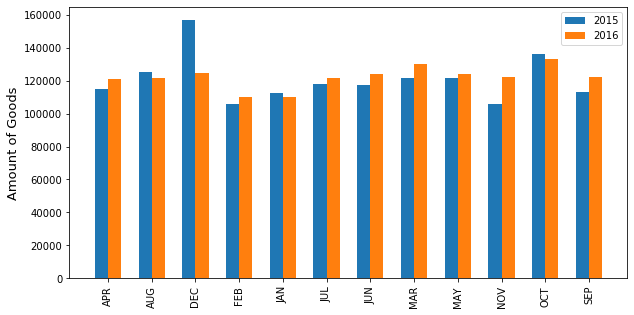

In [52]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonth2015G,width, label='2015')
plt.bar(ind+width, listYearMonth2016G,width, label='2016')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width / 2, months, rotation = 'vertical')
plt.legend()

plt.show()

## Comparison b/w amount of goods transported to India in diff months of year 2015.

In [53]:
listYearMonth2015GTo = grpYearMonth['FREIGHT TO INDIA'].take(np.arange(0,12))
listYearMonth2015GTo

YEAR  MONTH
2015  APR      44996.78955
      AUG      56823.41702
      DEC      46745.50798
      FEB      40590.82900
      JAN      39561.87300
      JUL      46769.79854
      JUN      45391.09253
      MAR      46228.85370
      MAY      48352.42728
      NOV      43958.21545
      OCT      54270.73571
      SEP      47047.73220
Name: FREIGHT TO INDIA, dtype: float64

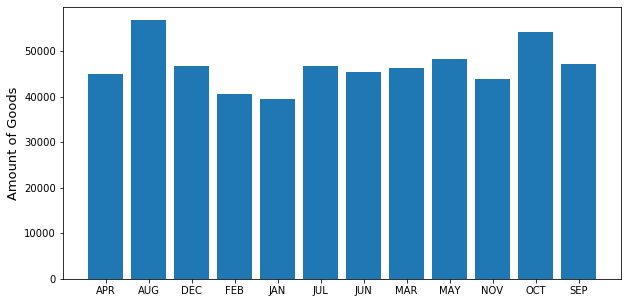

In [54]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2015GTo)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w amount of goods transported to India in diff months of year 2016.

In [55]:
listYearMonth2016GTo = grpYearMonth['FREIGHT TO INDIA'].take(np.arange(12,24))
listYearMonth2016GTo

YEAR  MONTH
2016  APR      45922.0
      AUG      47419.1
      DEC      51122.3
      FEB      41089.2
      JAN      43765.6
      JUL      48473.0
      JUN      45061.7
      MAR      49371.3
      MAY      46190.4
      NOV      49964.8
      OCT      52396.9
      SEP      49742.4
Name: FREIGHT TO INDIA, dtype: float64

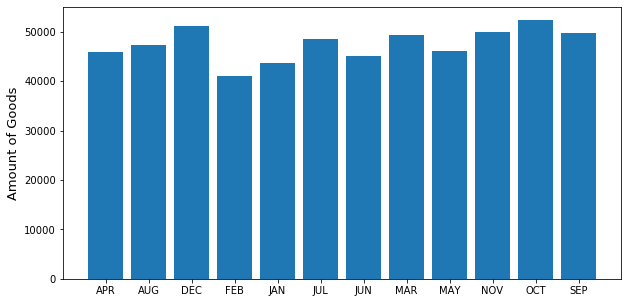

In [56]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2016GTo)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w amount of goods transported to India in diff months of year 2015 & 2016.

In [57]:
listYearMonth2015GTo

YEAR  MONTH
2015  APR      44996.78955
      AUG      56823.41702
      DEC      46745.50798
      FEB      40590.82900
      JAN      39561.87300
      JUL      46769.79854
      JUN      45391.09253
      MAR      46228.85370
      MAY      48352.42728
      NOV      43958.21545
      OCT      54270.73571
      SEP      47047.73220
Name: FREIGHT TO INDIA, dtype: float64

In [58]:
listYearMonth2016GTo

YEAR  MONTH
2016  APR      45922.0
      AUG      47419.1
      DEC      51122.3
      FEB      41089.2
      JAN      43765.6
      JUL      48473.0
      JUN      45061.7
      MAR      49371.3
      MAY      46190.4
      NOV      49964.8
      OCT      52396.9
      SEP      49742.4
Name: FREIGHT TO INDIA, dtype: float64

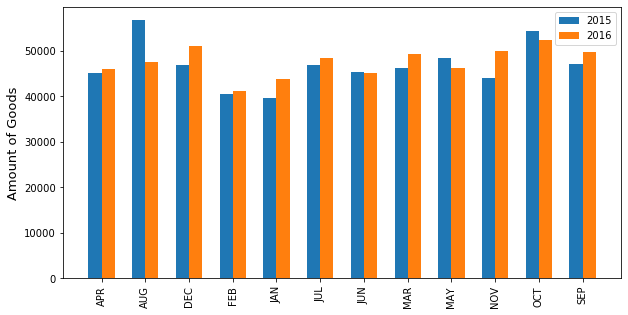

In [59]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonth2015GTo,width, label='2015')
plt.bar(ind+width, listYearMonth2016GTo,width, label='2016')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width / 2, months, rotation = 'vertical')
plt.legend()

plt.show()

## Comparison b/w amount of goods transported from India in diff months of year 2015.

In [60]:
listYearMonth2015GFrom = grpYearMonth['FREIGHT FROM INDIA'].take(np.arange(0,12))
listYearMonth2015GFrom

YEAR  MONTH
2015  APR       69767.42776
      AUG       68385.57020
      DEC      110252.47215
      FEB       65478.42300
      JAN       72763.17900
      JUL       71087.63352
      JUN       71952.19437
      MAR       75520.94550
      MAY       72994.30629
      NOV       62025.05838
      OCT       81603.12273
      SEP       65945.08340
Name: FREIGHT FROM INDIA, dtype: float64

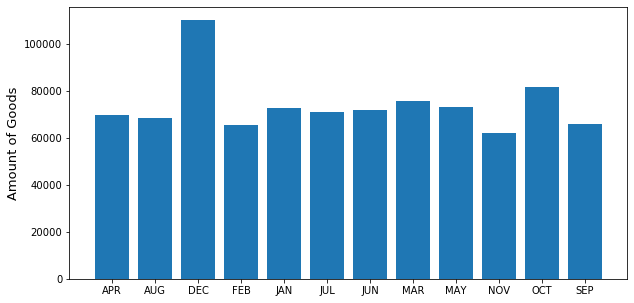

In [61]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2015GFrom)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w amount of goods transported from India in diff months of year 2016.

In [62]:
listYearMonth2016GFrom = grpYearMonth['FREIGHT FROM INDIA'].take(np.arange(12,24))
listYearMonth2016GFrom

YEAR  MONTH
2016  APR      75218.5
      AUG      73907.4
      DEC      73356.4
      FEB      68938.4
      JAN      66392.6
      JUL      73268.6
      JUN      78705.7
      MAR      80505.3
      MAY      77512.4
      NOV      71950.7
      OCT      80946.1
      SEP      72500.1
Name: FREIGHT FROM INDIA, dtype: float64

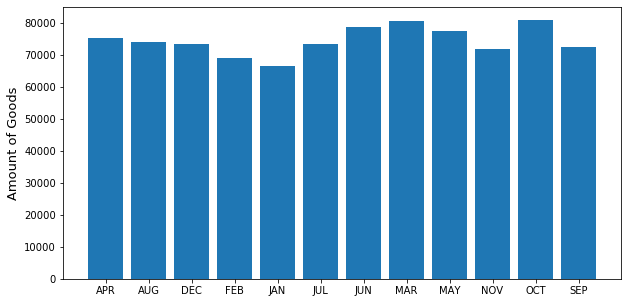

In [63]:
plt.figure(figsize=(10,5))

plt.bar(months, listYearMonth2016GFrom)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w amount of goods transported from India in diff months of year 2015 & 2016.

In [64]:
listYearMonth2015GFrom

YEAR  MONTH
2015  APR       69767.42776
      AUG       68385.57020
      DEC      110252.47215
      FEB       65478.42300
      JAN       72763.17900
      JUL       71087.63352
      JUN       71952.19437
      MAR       75520.94550
      MAY       72994.30629
      NOV       62025.05838
      OCT       81603.12273
      SEP       65945.08340
Name: FREIGHT FROM INDIA, dtype: float64

In [65]:
listYearMonth2016GFrom

YEAR  MONTH
2016  APR      75218.5
      AUG      73907.4
      DEC      73356.4
      FEB      68938.4
      JAN      66392.6
      JUL      73268.6
      JUN      78705.7
      MAR      80505.3
      MAY      77512.4
      NOV      71950.7
      OCT      80946.1
      SEP      72500.1
Name: FREIGHT FROM INDIA, dtype: float64

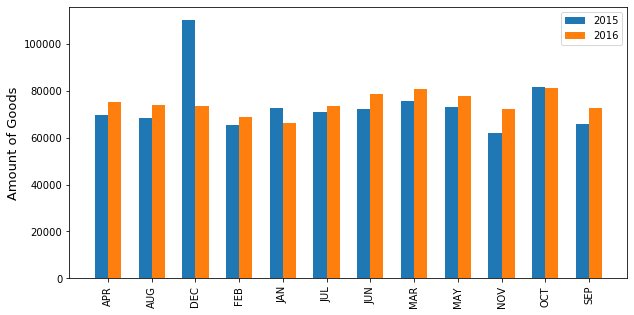

In [66]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonth2015GFrom,width, label='2015')
plt.bar(ind+width, listYearMonth2016GFrom,width, label='2016')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width / 2, months, rotation = 'vertical')
plt.legend()

plt.show()

## Comparison between No. of Passengers in different quarters of 2015.

In [67]:
df.head()

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers,Total_Freight/Goods
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,533096.0,7506.928
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,212181.0,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,142324.0,2132.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,652969.0,9557.389
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,80350.0,115.680


In [68]:
grpYearQuarter = df.groupby(['YEAR', 'QUARTER']).sum()
grpYearQuarter

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  FREIGHT TO INDIA  \
YEAR QUARTER                                                                 
2015 Q1                 5712230.0                6376365      126381.55570   
     Q2                 5876964.0                6276379      138740.30936   
     Q3                 5711102.0                6064483      150640.94776   
     Q4                 6481344.0                6141729      144974.45914   
2016 Q1                 6343530.0                6871288      134226.10000   
     Q2                 6521248.0                6775745      137174.10000   
     Q3                 6515859.0                6802518      145634.50000   
     Q4                 7163052.0                6672921      153484.00000   
2017 Q1                 6778304.0                7424671      154621.10000   

              FREIGHT FROM INDIA  Total_Passengers  Total_Freight/Goods  
YEAR QUARTER                                                             
2015 Q1             213762.54750        12088595.0         340144.10320  
     Q2             214713.92842        12153343.0         353454.23778  
     Q3             205418.28712        11775585.0         356059.23488  
     Q4             253880.65326        12623073.0         398855.11240  
2016 Q1             215836.30000        13214818.0         350062.40000  
     Q2             231436.60000        13296993.0         368610.70000  
     Q3             219676.10000        13318377.0         365310.60000  
     Q4             226253.20000        13835973.0         379737.20000  
2017 Q1             238545.90000        14202975.0         393167.00000

In [69]:
listYearQuarter2015 = grpYearQuarter['Total_Passengers'].take(range(0,4))
listYearQuarter2015

YEAR  QUARTER
2015  Q1         12088595.0
      Q2         12153343.0
      Q3         11775585.0
      Q4         12623073.0
Name: Total_Passengers, dtype: float64

In [70]:
quarters = ['Q1','Q2','Q3','Q4']

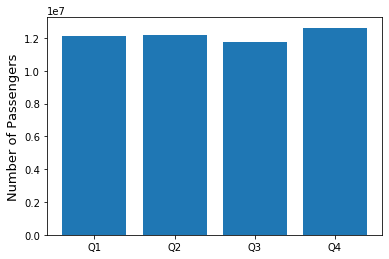

In [71]:
plt.bar(quarters, listYearQuarter2015)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers in different quarters of 2016.

In [72]:
listYearQuarter2016 = grpYearQuarter['Total_Passengers'].take(range(4,8))
listYearQuarter2016

YEAR  QUARTER
2016  Q1         13214818.0
      Q2         13296993.0
      Q3         13318377.0
      Q4         13835973.0
Name: Total_Passengers, dtype: float64

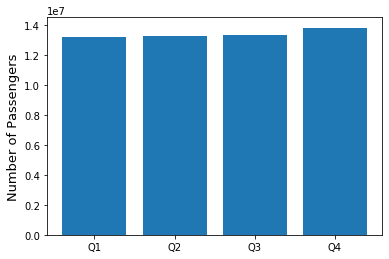

In [73]:
plt.bar(quarters, listYearQuarter2016)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers in different quarters of 2015 & 2016.

In [74]:
listYearQuarter2015

YEAR  QUARTER
2015  Q1         12088595.0
      Q2         12153343.0
      Q3         11775585.0
      Q4         12623073.0
Name: Total_Passengers, dtype: float64

In [75]:
listYearQuarter2016

YEAR  QUARTER
2016  Q1         13214818.0
      Q2         13296993.0
      Q3         13318377.0
      Q4         13835973.0
Name: Total_Passengers, dtype: float64

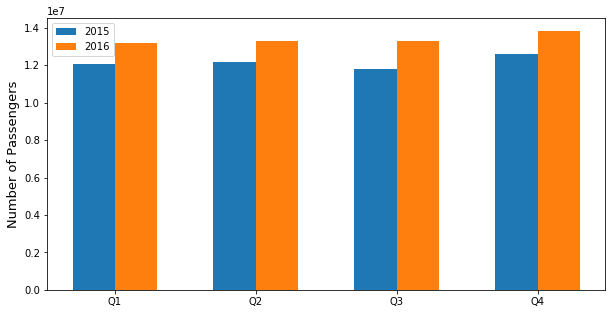

In [76]:
N = 4
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearQuarter2015,width, label='2015')
plt.bar(ind+width, listYearQuarter2016,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, quarters)
plt.legend()

plt.show()

## Comparison between No. of Passengers coming to India in different quarters of 2015.

In [77]:
grpYearQuarter

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  FREIGHT TO INDIA  \
YEAR QUARTER                                                                 
2015 Q1                 5712230.0                6376365      126381.55570   
     Q2                 5876964.0                6276379      138740.30936   
     Q3                 5711102.0                6064483      150640.94776   
     Q4                 6481344.0                6141729      144974.45914   
2016 Q1                 6343530.0                6871288      134226.10000   
     Q2                 6521248.0                6775745      137174.10000   
     Q3                 6515859.0                6802518      145634.50000   
     Q4                 7163052.0                6672921      153484.00000   
2017 Q1                 6778304.0                7424671      154621.10000   

              FREIGHT FROM INDIA  Total_Passengers  Total_Freight/Goods  
YEAR QUARTER                                                             
2015 Q1             213762.54750        12088595.0         340144.10320  
     Q2             214713.92842        12153343.0         353454.23778  
     Q3             205418.28712        11775585.0         356059.23488  
     Q4             253880.65326        12623073.0         398855.11240  
2016 Q1             215836.30000        13214818.0         350062.40000  
     Q2             231436.60000        13296993.0         368610.70000  
     Q3             219676.10000        13318377.0         365310.60000  
     Q4             226253.20000        13835973.0         379737.20000  
2017 Q1             238545.90000        14202975.0         393167.00000

In [78]:
listYearQuarter2015To = grpYearQuarter['PASSENGERS_TO_INDIA'].take(range(0,4))
listYearQuarter2015To

YEAR  QUARTER
2015  Q1         5712230.0
      Q2         5876964.0
      Q3         5711102.0
      Q4         6481344.0
Name: PASSENGERS_TO_INDIA, dtype: float64

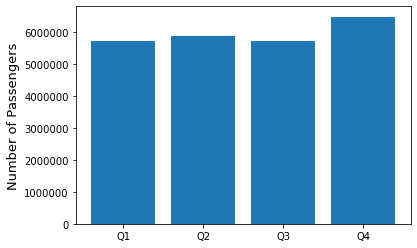

In [79]:
plt.bar(quarters, listYearQuarter2015To)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers coming to India in different quarters of 2016.

In [80]:
listYearQuarter2016To = grpYearQuarter['PASSENGERS_TO_INDIA'].take(range(4,8))
listYearQuarter2016To

YEAR  QUARTER
2016  Q1         6343530.0
      Q2         6521248.0
      Q3         6515859.0
      Q4         7163052.0
Name: PASSENGERS_TO_INDIA, dtype: float64

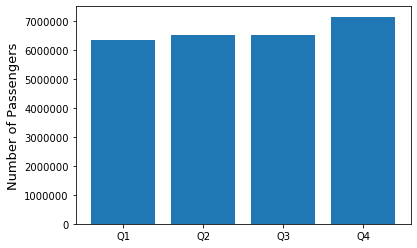

In [81]:
plt.bar(quarters, listYearQuarter2016To)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers coming to India in different quarters of 2015 & 2016.

In [82]:
listYearQuarter2015To

YEAR  QUARTER
2015  Q1         5712230.0
      Q2         5876964.0
      Q3         5711102.0
      Q4         6481344.0
Name: PASSENGERS_TO_INDIA, dtype: float64

In [83]:
listYearQuarter2016To

YEAR  QUARTER
2016  Q1         6343530.0
      Q2         6521248.0
      Q3         6515859.0
      Q4         7163052.0
Name: PASSENGERS_TO_INDIA, dtype: float64

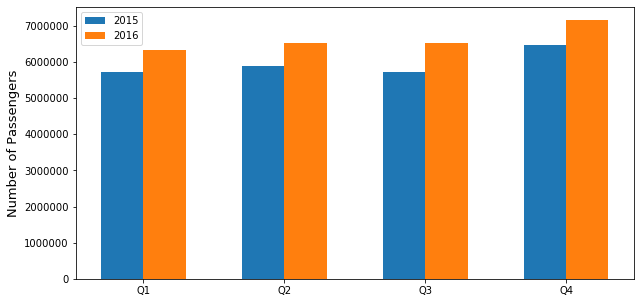

In [84]:
N = 4
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearQuarter2015To,width, label='2015')
plt.bar(ind+width, listYearQuarter2016To,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, quarters)
plt.legend()

plt.show()

## Comparison between No. of Passengers going from India in different quarters of 2015.

In [85]:
listYearQuarter2015From = grpYearQuarter['PASSENGERS_FROM_INDIA'].take(range(0,4))
listYearQuarter2015From

YEAR  QUARTER
2015  Q1         6376365
      Q2         6276379
      Q3         6064483
      Q4         6141729
Name: PASSENGERS_FROM_INDIA, dtype: int64

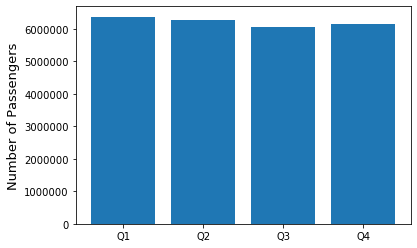

In [86]:
plt.bar(quarters, listYearQuarter2015From)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers going from India in different quarters of 2016.

In [87]:
listYearQuarter2016From = grpYearQuarter['PASSENGERS_FROM_INDIA'].take(range(4,8))
listYearQuarter2016From

YEAR  QUARTER
2016  Q1         6871288
      Q2         6775745
      Q3         6802518
      Q4         6672921
Name: PASSENGERS_FROM_INDIA, dtype: int64

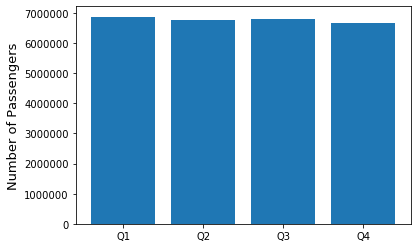

In [88]:
plt.bar(quarters, listYearQuarter2016From)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between No. of Passengers going from India in different quarters of 2015 & 2016.

In [89]:
listYearQuarter2015From

YEAR  QUARTER
2015  Q1         6376365
      Q2         6276379
      Q3         6064483
      Q4         6141729
Name: PASSENGERS_FROM_INDIA, dtype: int64

In [90]:
listYearQuarter2016From

YEAR  QUARTER
2016  Q1         6871288
      Q2         6775745
      Q3         6802518
      Q4         6672921
Name: PASSENGERS_FROM_INDIA, dtype: int64

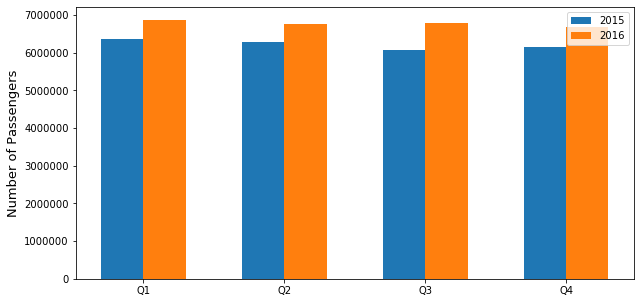

In [91]:
N = 4
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearQuarter2015From,width, label='2015')
plt.bar(ind+width, listYearQuarter2016From,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, quarters)
plt.legend()

plt.show()

## Comparison between Amount of Goods in different quarters of 2015.

In [92]:
grpYearQuarter

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  FREIGHT TO INDIA  \
YEAR QUARTER                                                                 
2015 Q1                 5712230.0                6376365      126381.55570   
     Q2                 5876964.0                6276379      138740.30936   
     Q3                 5711102.0                6064483      150640.94776   
     Q4                 6481344.0                6141729      144974.45914   
2016 Q1                 6343530.0                6871288      134226.10000   
     Q2                 6521248.0                6775745      137174.10000   
     Q3                 6515859.0                6802518      145634.50000   
     Q4                 7163052.0                6672921      153484.00000   
2017 Q1                 6778304.0                7424671      154621.10000   

              FREIGHT FROM INDIA  Total_Passengers  Total_Freight/Goods  
YEAR QUARTER                                                             
2015 Q1             213762.54750        12088595.0         340144.10320  
     Q2             214713.92842        12153343.0         353454.23778  
     Q3             205418.28712        11775585.0         356059.23488  
     Q4             253880.65326        12623073.0         398855.11240  
2016 Q1             215836.30000        13214818.0         350062.40000  
     Q2             231436.60000        13296993.0         368610.70000  
     Q3             219676.10000        13318377.0         365310.60000  
     Q4             226253.20000        13835973.0         379737.20000  
2017 Q1             238545.90000        14202975.0         393167.00000

In [93]:
listYearQuarter2015 = grpYearQuarter['Total_Freight/Goods'].take(range(0,4))
listYearQuarter2015

YEAR  QUARTER
2015  Q1         340144.10320
      Q2         353454.23778
      Q3         356059.23488
      Q4         398855.11240
Name: Total_Freight/Goods, dtype: float64

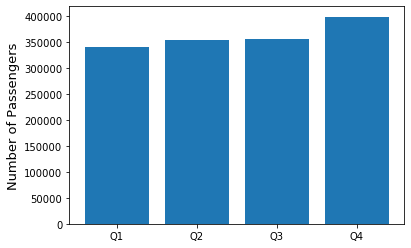

In [94]:
plt.bar(quarters, listYearQuarter2015)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between Amount of Goods in different quarters of 2016.

In [95]:
listYearQuarter2016 = grpYearQuarter['Total_Freight/Goods'].take(range(4,8))
listYearQuarter2016

YEAR  QUARTER
2016  Q1         350062.4
      Q2         368610.7
      Q3         365310.6
      Q4         379737.2
Name: Total_Freight/Goods, dtype: float64

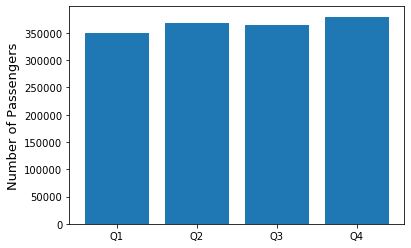

In [96]:
plt.bar(quarters, listYearQuarter2016)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between Amount of Goods in different quarters of 2015 & 2016.

In [97]:
listYearQuarter2015

YEAR  QUARTER
2015  Q1         340144.10320
      Q2         353454.23778
      Q3         356059.23488
      Q4         398855.11240
Name: Total_Freight/Goods, dtype: float64

In [98]:
listYearQuarter2016

YEAR  QUARTER
2016  Q1         350062.4
      Q2         368610.7
      Q3         365310.6
      Q4         379737.2
Name: Total_Freight/Goods, dtype: float64

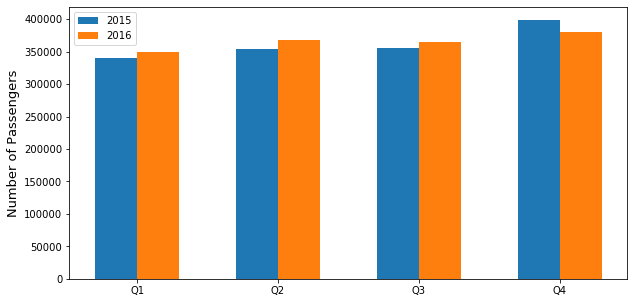

In [99]:
N = 4
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearQuarter2015,width, label='2015')
plt.bar(ind+width, listYearQuarter2016,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, quarters)
plt.legend()

plt.show()

## Comparison between Amount of Goods coming to India in different quarters of 2015.

In [100]:
grpYearQuarter

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  FREIGHT TO INDIA  \
YEAR QUARTER                                                                 
2015 Q1                 5712230.0                6376365      126381.55570   
     Q2                 5876964.0                6276379      138740.30936   
     Q3                 5711102.0                6064483      150640.94776   
     Q4                 6481344.0                6141729      144974.45914   
2016 Q1                 6343530.0                6871288      134226.10000   
     Q2                 6521248.0                6775745      137174.10000   
     Q3                 6515859.0                6802518      145634.50000   
     Q4                 7163052.0                6672921      153484.00000   
2017 Q1                 6778304.0                7424671      154621.10000   

              FREIGHT FROM INDIA  Total_Passengers  Total_Freight/Goods  
YEAR QUARTER                                                             
2015 Q1             213762.54750        12088595.0         340144.10320  
     Q2             214713.92842        12153343.0         353454.23778  
     Q3             205418.28712        11775585.0         356059.23488  
     Q4             253880.65326        12623073.0         398855.11240  
2016 Q1             215836.30000        13214818.0         350062.40000  
     Q2             231436.60000        13296993.0         368610.70000  
     Q3             219676.10000        13318377.0         365310.60000  
     Q4             226253.20000        13835973.0         379737.20000  
2017 Q1             238545.90000        14202975.0         393167.00000

In [101]:
listYearQuarter2015To = grpYearQuarter['FREIGHT TO INDIA'].take(range(0,4))
listYearQuarter2015To

YEAR  QUARTER
2015  Q1         126381.55570
      Q2         138740.30936
      Q3         150640.94776
      Q4         144974.45914
Name: FREIGHT TO INDIA, dtype: float64

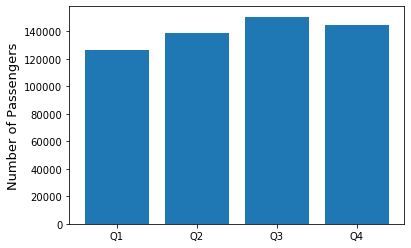

In [102]:
plt.bar(quarters, listYearQuarter2015To)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between Amount of Goods coming to India in different quarters of 2016.

In [103]:
listYearQuarter2016To = grpYearQuarter['FREIGHT TO INDIA'].take(range(4,8))
listYearQuarter2016To

YEAR  QUARTER
2016  Q1         134226.1
      Q2         137174.1
      Q3         145634.5
      Q4         153484.0
Name: FREIGHT TO INDIA, dtype: float64

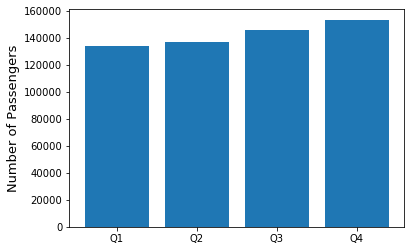

In [104]:
plt.bar(quarters, listYearQuarter2016To)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between Amount of Goods coming to India in different quarters of 2015 & 2016.

In [105]:
listYearQuarter2015To

YEAR  QUARTER
2015  Q1         126381.55570
      Q2         138740.30936
      Q3         150640.94776
      Q4         144974.45914
Name: FREIGHT TO INDIA, dtype: float64

In [106]:
listYearQuarter2016To

YEAR  QUARTER
2016  Q1         134226.1
      Q2         137174.1
      Q3         145634.5
      Q4         153484.0
Name: FREIGHT TO INDIA, dtype: float64

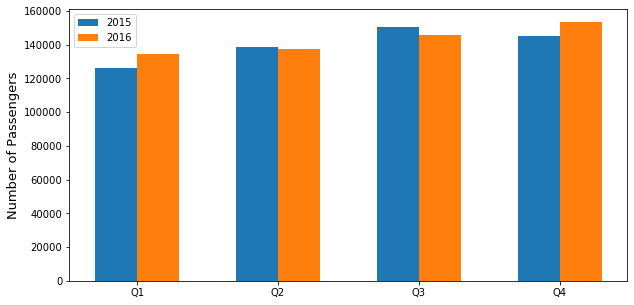

In [107]:
N = 4
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearQuarter2015To,width, label='2015')
plt.bar(ind+width, listYearQuarter2016To,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, quarters)
plt.legend()

plt.show()

## Comparison between Amount of Goods going from India in different quarters of 2015.

In [108]:
grpYearQuarter

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  FREIGHT TO INDIA  \
YEAR QUARTER                                                                 
2015 Q1                 5712230.0                6376365      126381.55570   
     Q2                 5876964.0                6276379      138740.30936   
     Q3                 5711102.0                6064483      150640.94776   
     Q4                 6481344.0                6141729      144974.45914   
2016 Q1                 6343530.0                6871288      134226.10000   
     Q2                 6521248.0                6775745      137174.10000   
     Q3                 6515859.0                6802518      145634.50000   
     Q4                 7163052.0                6672921      153484.00000   
2017 Q1                 6778304.0                7424671      154621.10000   

              FREIGHT FROM INDIA  Total_Passengers  Total_Freight/Goods  
YEAR QUARTER                                                             
2015 Q1             213762.54750        12088595.0         340144.10320  
     Q2             214713.92842        12153343.0         353454.23778  
     Q3             205418.28712        11775585.0         356059.23488  
     Q4             253880.65326        12623073.0         398855.11240  
2016 Q1             215836.30000        13214818.0         350062.40000  
     Q2             231436.60000        13296993.0         368610.70000  
     Q3             219676.10000        13318377.0         365310.60000  
     Q4             226253.20000        13835973.0         379737.20000  
2017 Q1             238545.90000        14202975.0         393167.00000

In [109]:
listYearQuarter2015From = grpYearQuarter['FREIGHT FROM INDIA'].take(range(0,4))
listYearQuarter2015From

YEAR  QUARTER
2015  Q1         213762.54750
      Q2         214713.92842
      Q3         205418.28712
      Q4         253880.65326
Name: FREIGHT FROM INDIA, dtype: float64

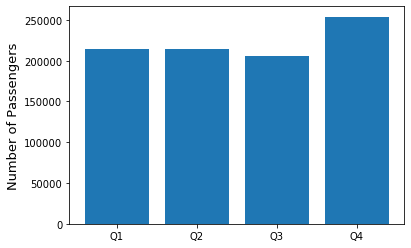

In [110]:
plt.bar(quarters, listYearQuarter2015From)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between Amount of Goods going from India in different quarters of 2016.

In [111]:
listYearQuarter2016From = grpYearQuarter['FREIGHT FROM INDIA'].take(range(4,8))
listYearQuarter2016From

YEAR  QUARTER
2016  Q1         215836.3
      Q2         231436.6
      Q3         219676.1
      Q4         226253.2
Name: FREIGHT FROM INDIA, dtype: float64

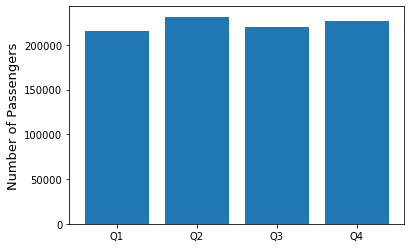

In [112]:
plt.bar(quarters, listYearQuarter2016From)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison between Amount of Goods going from India in different quarters of 2015 & 2016.

In [113]:
listYearQuarter2015From

YEAR  QUARTER
2015  Q1         213762.54750
      Q2         214713.92842
      Q3         205418.28712
      Q4         253880.65326
Name: FREIGHT FROM INDIA, dtype: float64

In [114]:
listYearQuarter2016From

YEAR  QUARTER
2016  Q1         215836.3
      Q2         231436.6
      Q3         219676.1
      Q4         226253.2
Name: FREIGHT FROM INDIA, dtype: float64

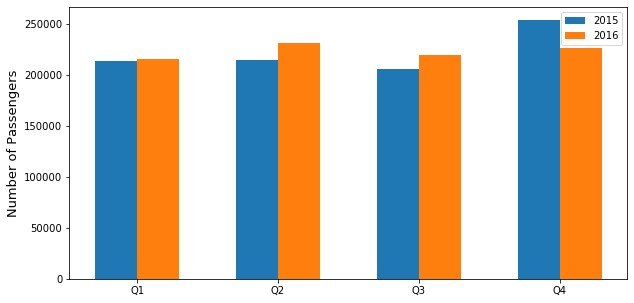

In [115]:
N = 4
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearQuarter2015From,width, label='2015')
plt.bar(ind+width, listYearQuarter2016From,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, quarters)
plt.legend()

plt.show()

## Comparison b/w No. of Passengers of diff Carrier Types in the year 2015.

In [116]:
df.head()

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers,Total_Freight/Goods
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,533096.0,7506.928
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,212181.0,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,142324.0,2132.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,652969.0,9557.389
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,80350.0,115.680


In [117]:
grpYearCar = df.groupby(['YEAR', 'CARRIER_TYPE']).sum()
grpYearCar

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  \
YEAR CARRIER_TYPE                                               
2015 DOMESTIC                8838387.0                9155796   
     FOREIGN                14943253.0               15703160   
2016 DOMESTIC                9855919.0               10052214   
     FOREIGN                16687770.0               17070258   
2017 DOMESTIC                2610747.0                2857382   
     FOREIGN                 4167557.0                4567289   

                   FREIGHT TO INDIA  FREIGHT FROM INDIA  Total_Passengers  \
YEAR CARRIER_TYPE                                                           
2015 DOMESTIC           93169.16896         144004.3053        17994183.0   
     FOREIGN           467568.10300         743771.1110        30646413.0   
2016 DOMESTIC           99831.60000         160730.6000        19908133.0   
     FOREIGN           470687.10000         732471.6000        33758028.0   
2017 DOMESTIC           31152.60000          50437.7000         5468129.0   
     FOREIGN           123468.50000         188108.2000         8734846.0   

                   Total_Freight/Goods  
YEAR CARRIER_TYPE                       
2015 DOMESTIC             2.371735e+05  
     FOREIGN              1.211339e+06  
2016 DOMESTIC             2.605622e+05  
     FOREIGN              1.203159e+06  
2017 DOMESTIC             8.159030e+04  
     FOREIGN              3.115767e+05

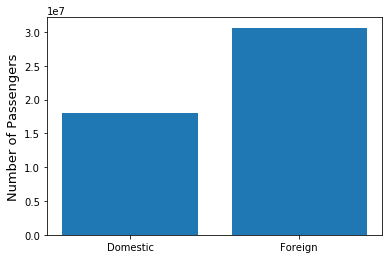

In [118]:
plt.bar(['Domestic', 'Foreign'], grpYearCar['Total_Passengers'].take([0,1]))

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w No. of Passengers of diff Carrier Types in the year 2016.

In [119]:
grpYearCar

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  \
YEAR CARRIER_TYPE                                               
2015 DOMESTIC                8838387.0                9155796   
     FOREIGN                14943253.0               15703160   
2016 DOMESTIC                9855919.0               10052214   
     FOREIGN                16687770.0               17070258   
2017 DOMESTIC                2610747.0                2857382   
     FOREIGN                 4167557.0                4567289   

                   FREIGHT TO INDIA  FREIGHT FROM INDIA  Total_Passengers  \
YEAR CARRIER_TYPE                                                           
2015 DOMESTIC           93169.16896         144004.3053        17994183.0   
     FOREIGN           467568.10300         743771.1110        30646413.0   
2016 DOMESTIC           99831.60000         160730.6000        19908133.0   
     FOREIGN           470687.10000         732471.6000        33758028.0   
2017 DOMESTIC           31152.60000          50437.7000         5468129.0   
     FOREIGN           123468.50000         188108.2000         8734846.0   

                   Total_Freight/Goods  
YEAR CARRIER_TYPE                       
2015 DOMESTIC             2.371735e+05  
     FOREIGN              1.211339e+06  
2016 DOMESTIC             2.605622e+05  
     FOREIGN              1.203159e+06  
2017 DOMESTIC             8.159030e+04  
     FOREIGN              3.115767e+05

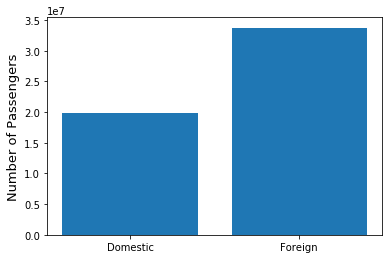

In [120]:
plt.bar(['Domestic', 'Foreign'], grpYearCar['Total_Passengers'].take([2,3]))

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w No. of Passengers of diff Carrier Types in year 2015 & 2016.

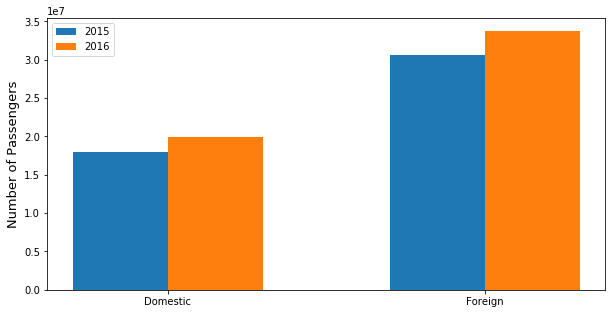

In [121]:
N = 2
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, grpYearCar['Total_Passengers'].take([0,1]),width, label='2015')
plt.bar(ind+width, grpYearCar['Total_Passengers'].take([2,3]),width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, ['Domestic', 'Foreign'])
plt.legend()

plt.show()

## Comparison b/w No. of Passengers coming to India using diff Carrier Types in the year 2015.

In [122]:
grpYearCar

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  \
YEAR CARRIER_TYPE                                               
2015 DOMESTIC                8838387.0                9155796   
     FOREIGN                14943253.0               15703160   
2016 DOMESTIC                9855919.0               10052214   
     FOREIGN                16687770.0               17070258   
2017 DOMESTIC                2610747.0                2857382   
     FOREIGN                 4167557.0                4567289   

                   FREIGHT TO INDIA  FREIGHT FROM INDIA  Total_Passengers  \
YEAR CARRIER_TYPE                                                           
2015 DOMESTIC           93169.16896         144004.3053        17994183.0   
     FOREIGN           467568.10300         743771.1110        30646413.0   
2016 DOMESTIC           99831.60000         160730.6000        19908133.0   
     FOREIGN           470687.10000         732471.6000        33758028.0   
2017 DOMESTIC           31152.60000          50437.7000         5468129.0   
     FOREIGN           123468.50000         188108.2000         8734846.0   

                   Total_Freight/Goods  
YEAR CARRIER_TYPE                       
2015 DOMESTIC             2.371735e+05  
     FOREIGN              1.211339e+06  
2016 DOMESTIC             2.605622e+05  
     FOREIGN              1.203159e+06  
2017 DOMESTIC             8.159030e+04  
     FOREIGN              3.115767e+05

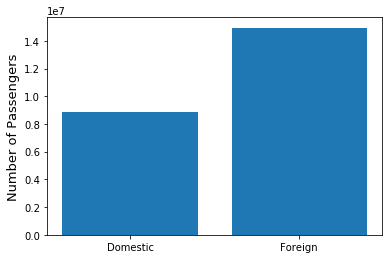

In [123]:
plt.bar(['Domestic', 'Foreign'], grpYearCar['PASSENGERS_TO_INDIA'].take([0,1]))

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w No. of Passengers coming to India using diff Carrier Types in the year 2016.

In [124]:
listYearCar2016To = grpYearCar['PASSENGERS_TO_INDIA'].take([2,3])
listYearCar2016To

YEAR  CARRIER_TYPE
2016  DOMESTIC         9855919.0
      FOREIGN         16687770.0
Name: PASSENGERS_TO_INDIA, dtype: float64

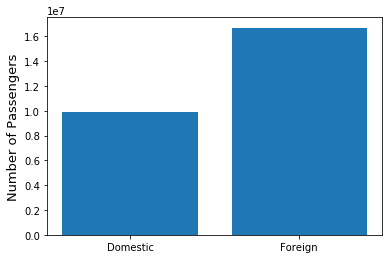

In [125]:
plt.bar(['Domestic', 'Foreign'], listYearCar2016To)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w No. of Passengers coming to India using diff Carrier Types in year 2015 & 2016.

In [126]:
listYearCar2016To

YEAR  CARRIER_TYPE
2016  DOMESTIC         9855919.0
      FOREIGN         16687770.0
Name: PASSENGERS_TO_INDIA, dtype: float64

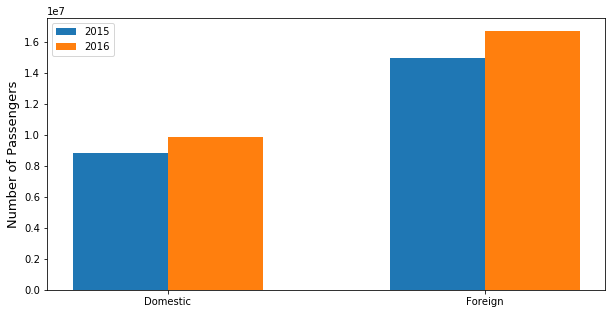

In [127]:
N = 2
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, grpYearCar['PASSENGERS_TO_INDIA'].take([0,1]),width, label='2015')
plt.bar(ind+width, listYearCar2016To,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, ['Domestic', 'Foreign'])
plt.legend()

plt.show()

## Comparison b/w No. of Passengers going from India using diff Carrier Types in the year 2015.

In [128]:
grpYearCar

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  \
YEAR CARRIER_TYPE                                               
2015 DOMESTIC                8838387.0                9155796   
     FOREIGN                14943253.0               15703160   
2016 DOMESTIC                9855919.0               10052214   
     FOREIGN                16687770.0               17070258   
2017 DOMESTIC                2610747.0                2857382   
     FOREIGN                 4167557.0                4567289   

                   FREIGHT TO INDIA  FREIGHT FROM INDIA  Total_Passengers  \
YEAR CARRIER_TYPE                                                           
2015 DOMESTIC           93169.16896         144004.3053        17994183.0   
     FOREIGN           467568.10300         743771.1110        30646413.0   
2016 DOMESTIC           99831.60000         160730.6000        19908133.0   
     FOREIGN           470687.10000         732471.6000        33758028.0   
2017 DOMESTIC           31152.60000          50437.7000         5468129.0   
     FOREIGN           123468.50000         188108.2000         8734846.0   

                   Total_Freight/Goods  
YEAR CARRIER_TYPE                       
2015 DOMESTIC             2.371735e+05  
     FOREIGN              1.211339e+06  
2016 DOMESTIC             2.605622e+05  
     FOREIGN              1.203159e+06  
2017 DOMESTIC             8.159030e+04  
     FOREIGN              3.115767e+05

In [129]:
listYearCarFrom2015 = grpYearCar['PASSENGERS_FROM_INDIA'].take([0,1])
listYearCarFrom2015

YEAR  CARRIER_TYPE
2015  DOMESTIC         9155796
      FOREIGN         15703160
Name: PASSENGERS_FROM_INDIA, dtype: int64

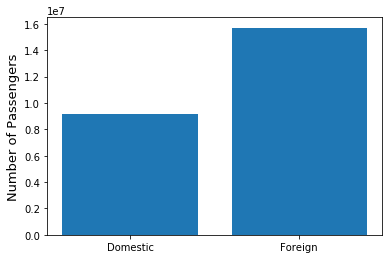

In [130]:
plt.bar(['Domestic', 'Foreign'], listYearCarFrom2015)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w No. of Passengers going from India using diff Carrier Types in the year 2016.

In [131]:
listYearCarFrom2016 = grpYearCar['PASSENGERS_FROM_INDIA'].take([2,3])
listYearCarFrom2016

YEAR  CARRIER_TYPE
2016  DOMESTIC        10052214
      FOREIGN         17070258
Name: PASSENGERS_FROM_INDIA, dtype: int64

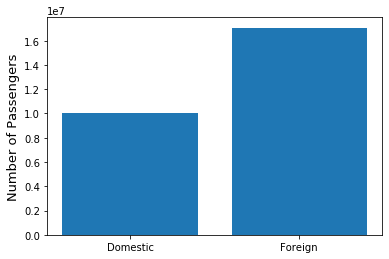

In [132]:
plt.bar(['Domestic', 'Foreign'], listYearCarFrom2016)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w No. of Passengers going from India using diff Carrier Types in year 2015 & 2016.

In [133]:
listYearCarFrom2015

YEAR  CARRIER_TYPE
2015  DOMESTIC         9155796
      FOREIGN         15703160
Name: PASSENGERS_FROM_INDIA, dtype: int64

In [134]:
listYearCarFrom2016

YEAR  CARRIER_TYPE
2016  DOMESTIC        10052214
      FOREIGN         17070258
Name: PASSENGERS_FROM_INDIA, dtype: int64

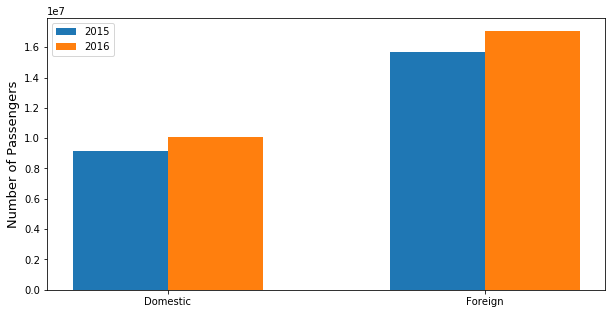

In [135]:
N = 2
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearCarFrom2015,width, label='2015')
plt.bar(ind+width, listYearCarFrom2016,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, ['Domestic', 'Foreign'])
plt.legend()

plt.show()

## Comparison b/w Amount of Goods transported using diff Carrier Types in the year 2015.

In [136]:
grpYearCar

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  \
YEAR CARRIER_TYPE                                               
2015 DOMESTIC                8838387.0                9155796   
     FOREIGN                14943253.0               15703160   
2016 DOMESTIC                9855919.0               10052214   
     FOREIGN                16687770.0               17070258   
2017 DOMESTIC                2610747.0                2857382   
     FOREIGN                 4167557.0                4567289   

                   FREIGHT TO INDIA  FREIGHT FROM INDIA  Total_Passengers  \
YEAR CARRIER_TYPE                                                           
2015 DOMESTIC           93169.16896         144004.3053        17994183.0   
     FOREIGN           467568.10300         743771.1110        30646413.0   
2016 DOMESTIC           99831.60000         160730.6000        19908133.0   
     FOREIGN           470687.10000         732471.6000        33758028.0   
2017 DOMESTIC           31152.60000          50437.7000         5468129.0   
     FOREIGN           123468.50000         188108.2000         8734846.0   

                   Total_Freight/Goods  
YEAR CARRIER_TYPE                       
2015 DOMESTIC             2.371735e+05  
     FOREIGN              1.211339e+06  
2016 DOMESTIC             2.605622e+05  
     FOREIGN              1.203159e+06  
2017 DOMESTIC             8.159030e+04  
     FOREIGN              3.115767e+05

In [137]:
listYearCar2015G = grpYearCar['Total_Freight/Goods'].take([0,1])
listYearCar2015G

YEAR  CARRIER_TYPE
2015  DOMESTIC        2.371735e+05
      FOREIGN         1.211339e+06
Name: Total_Freight/Goods, dtype: float64

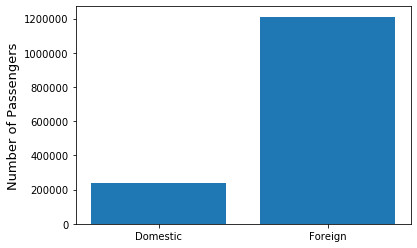

In [138]:
plt.bar(['Domestic', 'Foreign'], listYearCar2015G)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w Amount of Goods transported using diff Carrier Types in the year 2016.

In [139]:
listYearCar2016G = grpYearCar['Total_Freight/Goods'].take([2,3])
listYearCar2016G

YEAR  CARRIER_TYPE
2016  DOMESTIC         260562.2
      FOREIGN         1203158.7
Name: Total_Freight/Goods, dtype: float64

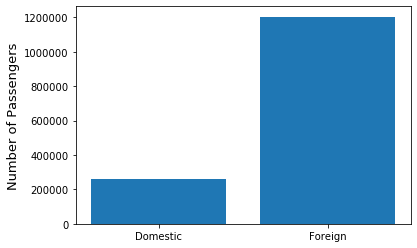

In [140]:
plt.bar(['Domestic', 'Foreign'], listYearCar2016G)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w Amount of Goods transported using diff Carrier Types in year 2015 & 2016.

In [141]:
listYearCar2015G

YEAR  CARRIER_TYPE
2015  DOMESTIC        2.371735e+05
      FOREIGN         1.211339e+06
Name: Total_Freight/Goods, dtype: float64

In [142]:
listYearCar2016G

YEAR  CARRIER_TYPE
2016  DOMESTIC         260562.2
      FOREIGN         1203158.7
Name: Total_Freight/Goods, dtype: float64

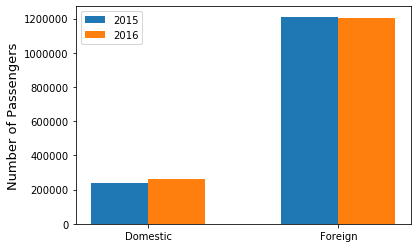

In [143]:
N = 2
ind = np.arange(N)
width = 0.3

plt.bar(ind, listYearCar2015G,width, label='2015')
plt.bar(ind+width, listYearCar2016G,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, ['Domestic', 'Foreign'])
plt.legend()

plt.show()

## Comparison b/w Amount of Goods transported to India using diff Carrier Types in the year 2015.

In [144]:
grpYearCar

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  \
YEAR CARRIER_TYPE                                               
2015 DOMESTIC                8838387.0                9155796   
     FOREIGN                14943253.0               15703160   
2016 DOMESTIC                9855919.0               10052214   
     FOREIGN                16687770.0               17070258   
2017 DOMESTIC                2610747.0                2857382   
     FOREIGN                 4167557.0                4567289   

                   FREIGHT TO INDIA  FREIGHT FROM INDIA  Total_Passengers  \
YEAR CARRIER_TYPE                                                           
2015 DOMESTIC           93169.16896         144004.3053        17994183.0   
     FOREIGN           467568.10300         743771.1110        30646413.0   
2016 DOMESTIC           99831.60000         160730.6000        19908133.0   
     FOREIGN           470687.10000         732471.6000        33758028.0   
2017 DOMESTIC           31152.60000          50437.7000         5468129.0   
     FOREIGN           123468.50000         188108.2000         8734846.0   

                   Total_Freight/Goods  
YEAR CARRIER_TYPE                       
2015 DOMESTIC             2.371735e+05  
     FOREIGN              1.211339e+06  
2016 DOMESTIC             2.605622e+05  
     FOREIGN              1.203159e+06  
2017 DOMESTIC             8.159030e+04  
     FOREIGN              3.115767e+05

In [145]:
listYearCar2015GTo = grpYearCar['FREIGHT TO INDIA'].take([0,1])
listYearCar2015GTo

YEAR  CARRIER_TYPE
2015  DOMESTIC         93169.16896
      FOREIGN         467568.10300
Name: FREIGHT TO INDIA, dtype: float64

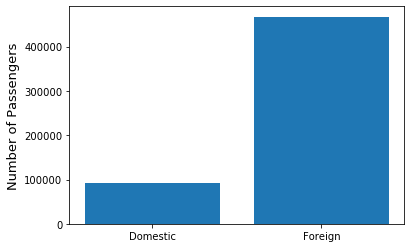

In [146]:
plt.bar(['Domestic', 'Foreign'], listYearCar2015GTo)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w Amount of Goods transported to India using diff Carrier Types in the year 2016.

In [147]:
listYearCar2016GTo = grpYearCar['FREIGHT TO INDIA'].take([2,3])
listYearCar2016GTo

YEAR  CARRIER_TYPE
2016  DOMESTIC         99831.6
      FOREIGN         470687.1
Name: FREIGHT TO INDIA, dtype: float64

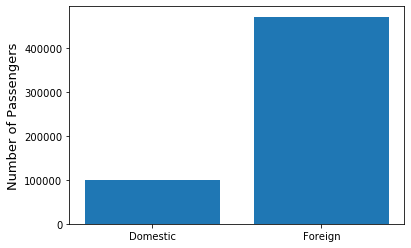

In [148]:
plt.bar(['Domestic', 'Foreign'], listYearCar2016GTo)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w Amount of Goods transported to India using diff Carrier Types in year 2015 & 2016.

In [149]:
listYearCar2015GTo

YEAR  CARRIER_TYPE
2015  DOMESTIC         93169.16896
      FOREIGN         467568.10300
Name: FREIGHT TO INDIA, dtype: float64

In [150]:
listYearCar2016GTo

YEAR  CARRIER_TYPE
2016  DOMESTIC         99831.6
      FOREIGN         470687.1
Name: FREIGHT TO INDIA, dtype: float64

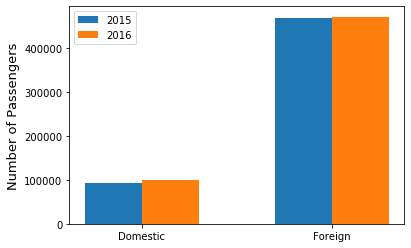

In [151]:
N = 2
ind = np.arange(N)
width = 0.3

plt.bar(ind, listYearCar2015GTo,width, label='2015')
plt.bar(ind+width, listYearCar2016GTo,width, label='2016')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, ['Domestic', 'Foreign'])
plt.legend()

plt.show()

## Comparison b/w No. of Passengers of Domestic type Carrier in diff months of 2015.

In [152]:
df.head()

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total_Passengers,Total_Freight/Goods
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,533096.0,7506.928
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,212181.0,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,142324.0,2132.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,652969.0,9557.389
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,80350.0,115.680


In [153]:
grpYearMonthCar = df.groupby(['YEAR', 'MONTH', 'CARRIER_TYPE']).sum()
grpYearMonthCar.head(48)

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  \
YEAR MONTH CARRIER_TYPE                                               
2015 APR   DOMESTIC                 671581.0                 801798   
           FOREIGN                 1107788.0                1336322   
     AUG   DOMESTIC                 699791.0                 856586   
           FOREIGN                 1115876.0                1404132   
     DEC   DOMESTIC                 862634.0                 793462   
           FOREIGN                 1479237.0                1393534   
     FEB   DOMESTIC                 661727.0                 730524   
           FOREIGN                 1102653.0                1251744   
     JAN   DOMESTIC                 781304.0                 839616   
           FOREIGN                 1298358.0                1396445   
     JUL   DOMESTIC                 818183.0                 652932   
           FOREIGN                 1360011.0                1140516   
     JUN   DOMESTIC                 763404.0                 702237   
           FOREIGN                 1301556.0                1202246   
     MAR   DOMESTIC                 709290.0                 788060   
           FOREIGN                 1158898.0                1369976   
     MAY   DOMESTIC                 753963.0                 809880   
           FOREIGN                 1278672.0                1423896   
     NOV   DOMESTIC                 769421.0                 710425   
           FOREIGN                 1327516.0                1232771   
     OCT   DOMESTIC                 705168.0                 706600   
           FOREIGN                 1337368.0                1304937   
     SEP   DOMESTIC                 641921.0                 763676   
           FOREIGN                 1075320.0                1246641   
2016 APR   DOMESTIC                 727462.0                 880411   
           FOREIGN                 1231878.0                1494772   
     AUG   DOMESTIC                 792907.0                 929122   
           FOREIGN                 1274782.0                1494941   
     DEC   DOMESTIC                1024151.0                 911477   
           FOREIGN                 1614053.0                1472095   
     FEB   DOMESTIC                 693401.0                 775836   
           FOREIGN                 1280287.0                1347544   
     JAN   DOMESTIC                 799745.0                 870811   
           FOREIGN                 1463607.0                1551157   
     JUL   DOMESTIC                 948299.0                 773383   
           FOREIGN                 1526838.0                1308324   
     JUN   DOMESTIC                 869940.0                 697900   
           FOREIGN                 1485356.0                1264725   
     MAR   DOMESTIC                 777819.0                 839720   
           FOREIGN                 1328671.0                1486220   
     MAY   DOMESTIC                 794654.0                 884351   
           FOREIGN                 1411958.0                1553586   
     NOV   DOMESTIC                 856137.0                 809168   
           FOREIGN                 1468622.0                1385474   
     OCT   DOMESTIC                 820551.0                 801360   
           FOREIGN                 1379538.0                1293347   
     SEP   DOMESTIC                 750853.0                 878675   
           FOREIGN                 1222180.0                1418073   

                         FREIGHT TO INDIA  FREIGHT FROM INDIA  \
YEAR MONTH CARRIER_TYPE                                         
2015 APR   DOMESTIC            7681.87555         11900.11876   
           FOREIGN            37314.91400         57867.30900   
     AUG   DOMESTIC            7872.72602         12034.08820   
           FOREIGN            48950.69100         56351.48200   
     DEC   DOMESTIC            8065.28098         11901.59215   
           FOREIGN 

In [154]:
listYearMonthCar2015D = grpYearMonthCar['Total_Passengers'].take(range(0,24,2))
listYearMonthCar2015D

YEAR  MONTH  CARRIER_TYPE
2015  APR    DOMESTIC        1473379.0
      AUG    DOMESTIC        1556377.0
      DEC    DOMESTIC        1656096.0
      FEB    DOMESTIC        1392251.0
      JAN    DOMESTIC        1620920.0
      JUL    DOMESTIC        1471115.0
      JUN    DOMESTIC        1465641.0
      MAR    DOMESTIC        1497350.0
      MAY    DOMESTIC        1563843.0
      NOV    DOMESTIC        1479846.0
      OCT    DOMESTIC        1411768.0
      SEP    DOMESTIC        1405597.0
Name: Total_Passengers, dtype: float64

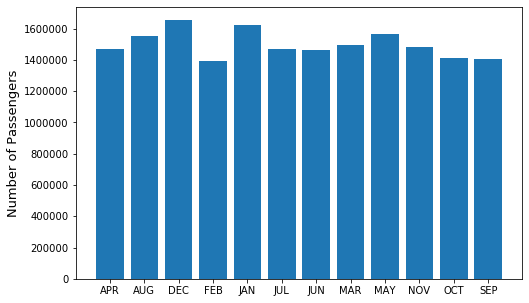

In [155]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2015D)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w No. of Passengers of Foreign type Carrier in diff months of 2015.

In [156]:
listYearMonthCar2015F = grpYearMonthCar['Total_Passengers'].take(range(1,24,2))
listYearMonthCar2015F

YEAR  MONTH  CARRIER_TYPE
2015  APR    FOREIGN         2444110.0
      AUG    FOREIGN         2520008.0
      DEC    FOREIGN         2872771.0
      FEB    FOREIGN         2354397.0
      JAN    FOREIGN         2694803.0
      JUL    FOREIGN         2500527.0
      JUN    FOREIGN         2503802.0
      MAR    FOREIGN         2528874.0
      MAY    FOREIGN         2702568.0
      NOV    FOREIGN         2560287.0
      OCT    FOREIGN         2642305.0
      SEP    FOREIGN         2321961.0
Name: Total_Passengers, dtype: float64

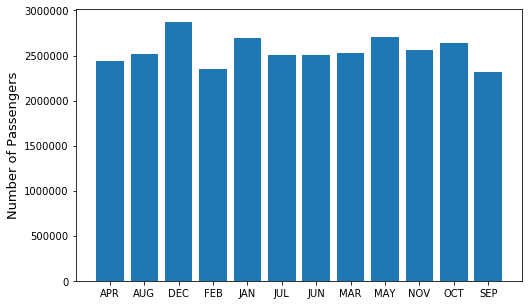

In [157]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2015F)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w No. of Passengers of diff Carrier Types in diff months of 2015.

In [158]:
listYearMonthCar2015D

YEAR  MONTH  CARRIER_TYPE
2015  APR    DOMESTIC        1473379.0
      AUG    DOMESTIC        1556377.0
      DEC    DOMESTIC        1656096.0
      FEB    DOMESTIC        1392251.0
      JAN    DOMESTIC        1620920.0
      JUL    DOMESTIC        1471115.0
      JUN    DOMESTIC        1465641.0
      MAR    DOMESTIC        1497350.0
      MAY    DOMESTIC        1563843.0
      NOV    DOMESTIC        1479846.0
      OCT    DOMESTIC        1411768.0
      SEP    DOMESTIC        1405597.0
Name: Total_Passengers, dtype: float64

In [159]:
listYearMonthCar2015F

YEAR  MONTH  CARRIER_TYPE
2015  APR    FOREIGN         2444110.0
      AUG    FOREIGN         2520008.0
      DEC    FOREIGN         2872771.0
      FEB    FOREIGN         2354397.0
      JAN    FOREIGN         2694803.0
      JUL    FOREIGN         2500527.0
      JUN    FOREIGN         2503802.0
      MAR    FOREIGN         2528874.0
      MAY    FOREIGN         2702568.0
      NOV    FOREIGN         2560287.0
      OCT    FOREIGN         2642305.0
      SEP    FOREIGN         2321961.0
Name: Total_Passengers, dtype: float64

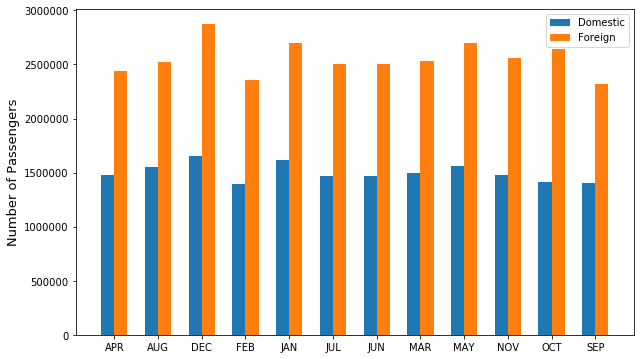

In [160]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,6))

plt.bar(ind, listYearMonthCar2015D,width, label='Domestic')
plt.bar(ind+width, listYearMonthCar2015F,width, label='Foreign')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, months)
plt.legend()

plt.show()

## Comparison b/w No. of Passengers of Domestic type Carrier in diff months of 2016.

In [161]:
listYearMonthCar2016D = grpYearMonthCar['Total_Passengers'].take(range(24,48,2))
listYearMonthCar2016D

YEAR  MONTH  CARRIER_TYPE
2016  APR    DOMESTIC        1607873.0
      AUG    DOMESTIC        1722029.0
      DEC    DOMESTIC        1935628.0
      FEB    DOMESTIC        1469237.0
      JAN    DOMESTIC        1670556.0
      JUL    DOMESTIC        1721682.0
      JUN    DOMESTIC        1567840.0
      MAR    DOMESTIC        1617539.0
      MAY    DOMESTIC        1679005.0
      NOV    DOMESTIC        1665305.0
      OCT    DOMESTIC        1621911.0
      SEP    DOMESTIC        1629528.0
Name: Total_Passengers, dtype: float64

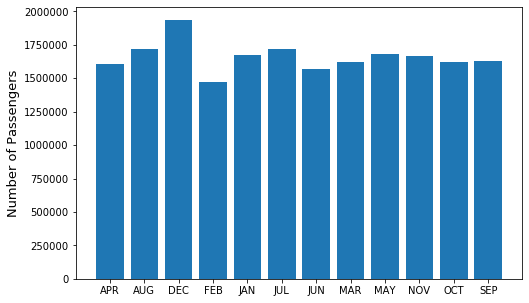

In [162]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2016D)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w No. of Passengers of Foreign type Carrier in diff months of 2016.

In [163]:
listYearMonthCar2016F = grpYearMonthCar['Total_Passengers'].take(range(25,48,2))
listYearMonthCar2016F

YEAR  MONTH  CARRIER_TYPE
2016  APR    FOREIGN         2726650.0
      AUG    FOREIGN         2769723.0
      DEC    FOREIGN         3086148.0
      FEB    FOREIGN         2627831.0
      JAN    FOREIGN         3014764.0
      JUL    FOREIGN         2835162.0
      JUN    FOREIGN         2750081.0
      MAR    FOREIGN         2814891.0
      MAY    FOREIGN         2965544.0
      NOV    FOREIGN         2854096.0
      OCT    FOREIGN         2672885.0
      SEP    FOREIGN         2640253.0
Name: Total_Passengers, dtype: float64

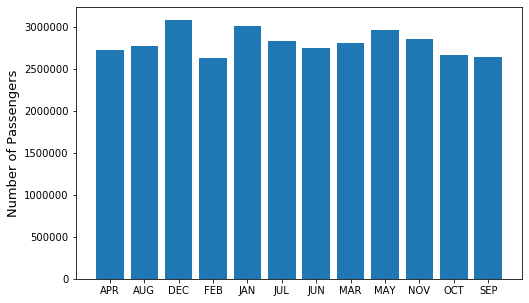

In [164]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2016F)

plt.ylabel("Number of Passengers", size=13)

plt.show()

## Comparison b/w No. of Passengers of diff Carrier Types in diff months of 2016.

In [165]:
listYearMonthCar2016D

YEAR  MONTH  CARRIER_TYPE
2016  APR    DOMESTIC        1607873.0
      AUG    DOMESTIC        1722029.0
      DEC    DOMESTIC        1935628.0
      FEB    DOMESTIC        1469237.0
      JAN    DOMESTIC        1670556.0
      JUL    DOMESTIC        1721682.0
      JUN    DOMESTIC        1567840.0
      MAR    DOMESTIC        1617539.0
      MAY    DOMESTIC        1679005.0
      NOV    DOMESTIC        1665305.0
      OCT    DOMESTIC        1621911.0
      SEP    DOMESTIC        1629528.0
Name: Total_Passengers, dtype: float64

In [166]:
listYearMonthCar2016F

YEAR  MONTH  CARRIER_TYPE
2016  APR    FOREIGN         2726650.0
      AUG    FOREIGN         2769723.0
      DEC    FOREIGN         3086148.0
      FEB    FOREIGN         2627831.0
      JAN    FOREIGN         3014764.0
      JUL    FOREIGN         2835162.0
      JUN    FOREIGN         2750081.0
      MAR    FOREIGN         2814891.0
      MAY    FOREIGN         2965544.0
      NOV    FOREIGN         2854096.0
      OCT    FOREIGN         2672885.0
      SEP    FOREIGN         2640253.0
Name: Total_Passengers, dtype: float64

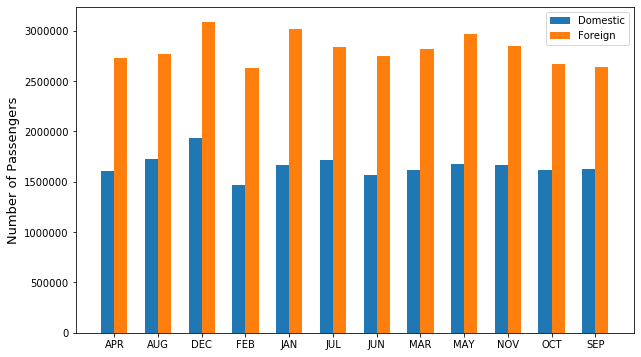

In [167]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,6))

plt.bar(ind, listYearMonthCar2016D,width, label='Domestic')
plt.bar(ind+width, listYearMonthCar2016F,width, label='Foreign')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width / 2, months)
plt.legend()

plt.show()

## Comparison b/w No. of Passengers of diff Carrier Types in diff months of 2015 & 2016.

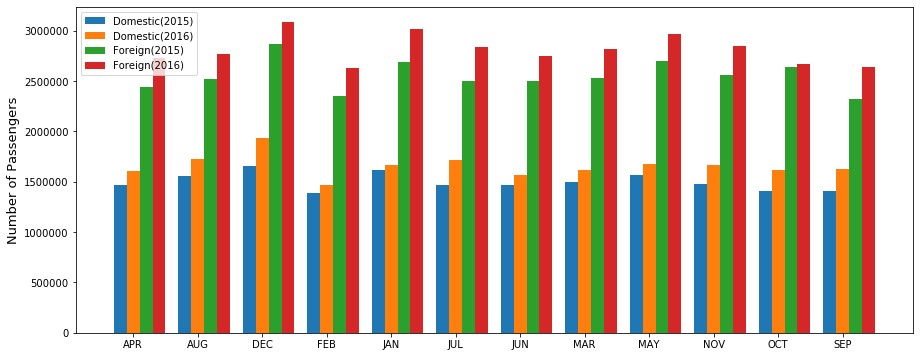

In [168]:
N = 12
ind = np.arange(N)
width = 0.2

plt.figure(figsize=(15,6))

plt.bar(ind, listYearMonthCar2015D,width, label='Domestic(2015)')
plt.bar(ind+width, listYearMonthCar2016D,width, label='Domestic(2016)')
plt.bar(ind+width+width, listYearMonthCar2015F,width, label='Foreign(2015)')
plt.bar(ind+width+width+width, listYearMonthCar2016F,width, label='Foreign(2016)')

plt.ylabel("Number of Passengers", size=13)

plt.xticks(ind + width, months)
plt.legend()

plt.show()

## Comparison b/w Amount of Goods transported using Domestic type Carrier in diff months of 2015.

In [169]:
grpYearMonthCar.head(48)

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  \
YEAR MONTH CARRIER_TYPE                                               
2015 APR   DOMESTIC                 671581.0                 801798   
           FOREIGN                 1107788.0                1336322   
     AUG   DOMESTIC                 699791.0                 856586   
           FOREIGN                 1115876.0                1404132   
     DEC   DOMESTIC                 862634.0                 793462   
           FOREIGN                 1479237.0                1393534   
     FEB   DOMESTIC                 661727.0                 730524   
           FOREIGN                 1102653.0                1251744   
     JAN   DOMESTIC                 781304.0                 839616   
           FOREIGN                 1298358.0                1396445   
     JUL   DOMESTIC                 818183.0                 652932   
           FOREIGN                 1360011.0                1140516   
     JUN   DOMESTIC                 763404.0                 702237   
           FOREIGN                 1301556.0                1202246   
     MAR   DOMESTIC                 709290.0                 788060   
           FOREIGN                 1158898.0                1369976   
     MAY   DOMESTIC                 753963.0                 809880   
           FOREIGN                 1278672.0                1423896   
     NOV   DOMESTIC                 769421.0                 710425   
           FOREIGN                 1327516.0                1232771   
     OCT   DOMESTIC                 705168.0                 706600   
           FOREIGN                 1337368.0                1304937   
     SEP   DOMESTIC                 641921.0                 763676   
           FOREIGN                 1075320.0                1246641   
2016 APR   DOMESTIC                 727462.0                 880411   
           FOREIGN                 1231878.0                1494772   
     AUG   DOMESTIC                 792907.0                 929122   
           FOREIGN                 1274782.0                1494941   
     DEC   DOMESTIC                1024151.0                 911477   
           FOREIGN                 1614053.0                1472095   
     FEB   DOMESTIC                 693401.0                 775836   
           FOREIGN                 1280287.0                1347544   
     JAN   DOMESTIC                 799745.0                 870811   
           FOREIGN                 1463607.0                1551157   
     JUL   DOMESTIC                 948299.0                 773383   
           FOREIGN                 1526838.0                1308324   
     JUN   DOMESTIC                 869940.0                 697900   
           FOREIGN                 1485356.0                1264725   
     MAR   DOMESTIC                 777819.0                 839720   
           FOREIGN                 1328671.0                1486220   
     MAY   DOMESTIC                 794654.0                 884351   
           FOREIGN                 1411958.0                1553586   
     NOV   DOMESTIC                 856137.0                 809168   
           FOREIGN                 1468622.0                1385474   
     OCT   DOMESTIC                 820551.0                 801360   
           FOREIGN                 1379538.0                1293347   
     SEP   DOMESTIC                 750853.0                 878675   
           FOREIGN                 1222180.0                1418073   

                         FREIGHT TO INDIA  FREIGHT FROM INDIA  \
YEAR MONTH CARRIER_TYPE                                         
2015 APR   DOMESTIC            7681.87555         11900.11876   
           FOREIGN            37314.91400         57867.30900   
     AUG   DOMESTIC            7872.72602         12034.08820   
           FOREIGN            48950.69100         56351.48200   
     DEC   DOMESTIC            8065.28098         11901.59215   
           FOREIGN 

In [170]:
listYearMonthCar2015DG = grpYearMonthCar['Total_Freight/Goods'].take(range(0,24,2))
listYearMonthCar2015DG

YEAR  MONTH  CARRIER_TYPE
2015  APR    DOMESTIC        19581.99431
      AUG    DOMESTIC        19906.81422
      DEC    DOMESTIC        19966.87313
      FEB    DOMESTIC        19245.15000
      JAN    DOMESTIC        19311.99700
      JUL    DOMESTIC        19961.94906
      JUN    DOMESTIC        20126.92590
      MAR    DOMESTIC        20329.12120
      MAY    DOMESTIC        19824.94957
      NOV    DOMESTIC        19397.31183
      OCT    DOMESTIC        20340.55744
      SEP    DOMESTIC        19179.83060
Name: Total_Freight/Goods, dtype: float64

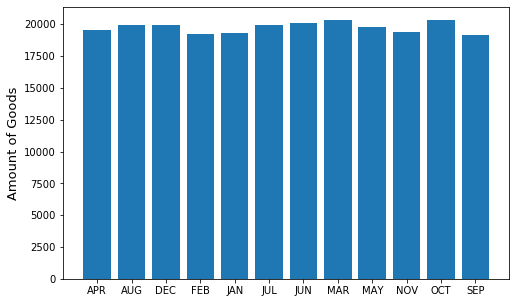

In [171]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2015DG)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported using Foreign type Carrier in diff months of 2015.

In [172]:
listYearMonthCar2015FG = grpYearMonthCar['Total_Freight/Goods'].take(range(1,24,2))
listYearMonthCar2015FG

YEAR  MONTH  CARRIER_TYPE
2015  APR    FOREIGN          95182.223
      AUG    FOREIGN         105302.173
      DEC    FOREIGN         137031.107
      FEB    FOREIGN          86824.102
      JAN    FOREIGN          93013.055
      JUL    FOREIGN          97895.483
      JUN    FOREIGN          97216.361
      MAR    FOREIGN         101420.678
      MAY    FOREIGN         101521.784
      NOV    FOREIGN          86585.962
      OCT    FOREIGN         115533.301
      SEP    FOREIGN          93812.985
Name: Total_Freight/Goods, dtype: float64

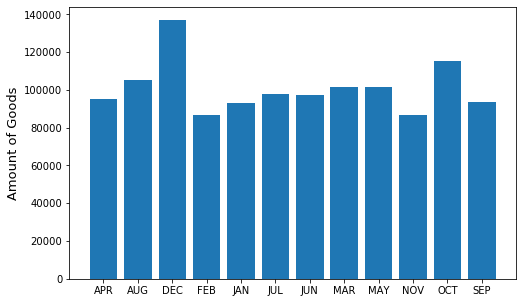

In [173]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2015FG)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported using diff Carrier Types in diff months of 2015.

In [174]:
listYearMonthCar2015DG

YEAR  MONTH  CARRIER_TYPE
2015  APR    DOMESTIC        19581.99431
      AUG    DOMESTIC        19906.81422
      DEC    DOMESTIC        19966.87313
      FEB    DOMESTIC        19245.15000
      JAN    DOMESTIC        19311.99700
      JUL    DOMESTIC        19961.94906
      JUN    DOMESTIC        20126.92590
      MAR    DOMESTIC        20329.12120
      MAY    DOMESTIC        19824.94957
      NOV    DOMESTIC        19397.31183
      OCT    DOMESTIC        20340.55744
      SEP    DOMESTIC        19179.83060
Name: Total_Freight/Goods, dtype: float64

In [175]:
listYearMonthCar2015FG

YEAR  MONTH  CARRIER_TYPE
2015  APR    FOREIGN          95182.223
      AUG    FOREIGN         105302.173
      DEC    FOREIGN         137031.107
      FEB    FOREIGN          86824.102
      JAN    FOREIGN          93013.055
      JUL    FOREIGN          97895.483
      JUN    FOREIGN          97216.361
      MAR    FOREIGN         101420.678
      MAY    FOREIGN         101521.784
      NOV    FOREIGN          86585.962
      OCT    FOREIGN         115533.301
      SEP    FOREIGN          93812.985
Name: Total_Freight/Goods, dtype: float64

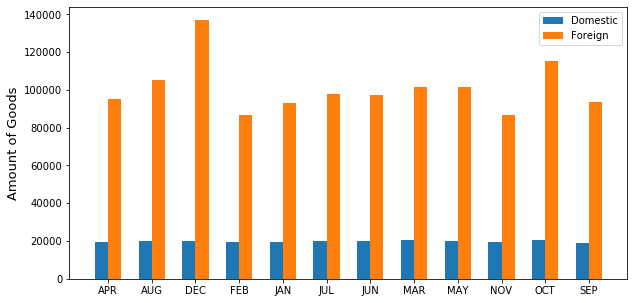

In [176]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonthCar2015DG,width, label='Domestic')
plt.bar(ind+width, listYearMonthCar2015FG,width, label='Foreign')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width / 2, months)
plt.legend()

plt.show()

## Comparison b/w Amount of Goods transported using Domestic type Carrier in diff months of 2016.

In [177]:
listYearMonthCar2016DG = grpYearMonthCar['Total_Freight/Goods'].take(range(24,48,2))
listYearMonthCar2016DG

YEAR  MONTH  CARRIER_TYPE
2016  APR    DOMESTIC        20597.0
      AUG    DOMESTIC        21886.6
      DEC    DOMESTIC        25536.2
      FEB    DOMESTIC        19046.9
      JAN    DOMESTIC        18613.6
      JUL    DOMESTIC        20933.5
      JUN    DOMESTIC        21941.8
      MAR    DOMESTIC        20616.8
      MAY    DOMESTIC        21247.2
      NOV    DOMESTIC        23790.7
      OCT    DOMESTIC        24191.4
      SEP    DOMESTIC        22160.5
Name: Total_Freight/Goods, dtype: float64

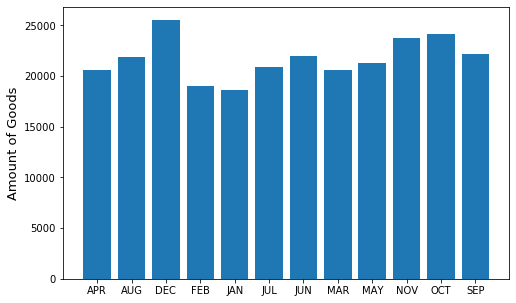

In [178]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2016DG)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported using Foreign type Carrier in diff months of 2016.

In [179]:
listYearMonthCar2016FG = grpYearMonthCar['Total_Freight/Goods'].take(range(25,48,2))
listYearMonthCar2016FG

YEAR  MONTH  CARRIER_TYPE
2016  APR    FOREIGN         100543.5
      AUG    FOREIGN          99439.9
      DEC    FOREIGN          98942.5
      FEB    FOREIGN          90980.7
      JAN    FOREIGN          91544.6
      JUL    FOREIGN         100808.1
      JUN    FOREIGN         101825.6
      MAR    FOREIGN         109259.8
      MAY    FOREIGN         102455.6
      NOV    FOREIGN          98124.8
      OCT    FOREIGN         109151.6
      SEP    FOREIGN         100082.0
Name: Total_Freight/Goods, dtype: float64

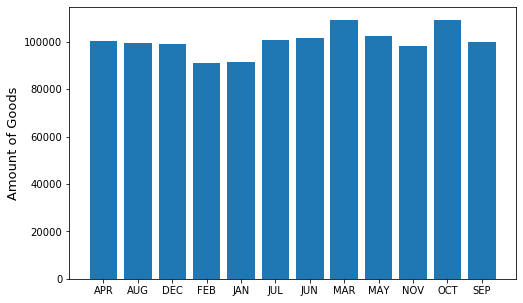

In [180]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2016FG)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported using diff Carrier Types in diff months of 2016.

In [181]:
listYearMonthCar2016DG

YEAR  MONTH  CARRIER_TYPE
2016  APR    DOMESTIC        20597.0
      AUG    DOMESTIC        21886.6
      DEC    DOMESTIC        25536.2
      FEB    DOMESTIC        19046.9
      JAN    DOMESTIC        18613.6
      JUL    DOMESTIC        20933.5
      JUN    DOMESTIC        21941.8
      MAR    DOMESTIC        20616.8
      MAY    DOMESTIC        21247.2
      NOV    DOMESTIC        23790.7
      OCT    DOMESTIC        24191.4
      SEP    DOMESTIC        22160.5
Name: Total_Freight/Goods, dtype: float64

In [182]:
listYearMonthCar2016FG

YEAR  MONTH  CARRIER_TYPE
2016  APR    FOREIGN         100543.5
      AUG    FOREIGN          99439.9
      DEC    FOREIGN          98942.5
      FEB    FOREIGN          90980.7
      JAN    FOREIGN          91544.6
      JUL    FOREIGN         100808.1
      JUN    FOREIGN         101825.6
      MAR    FOREIGN         109259.8
      MAY    FOREIGN         102455.6
      NOV    FOREIGN          98124.8
      OCT    FOREIGN         109151.6
      SEP    FOREIGN         100082.0
Name: Total_Freight/Goods, dtype: float64

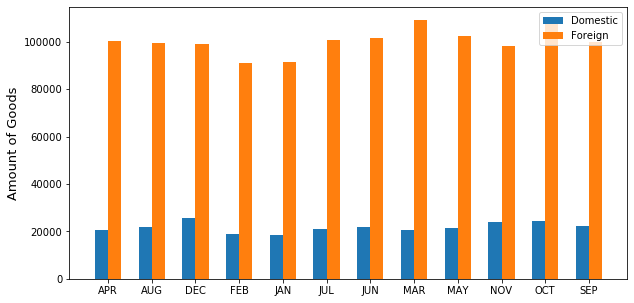

In [183]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonthCar2016DG,width, label='Domestic')
plt.bar(ind+width, listYearMonthCar2016FG,width, label='Foreign')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width / 2, months)
plt.legend()

plt.show()

## Comparison b/w Amount of Goods transported using diff Carrier Types in diff months of 2015 & 2016.

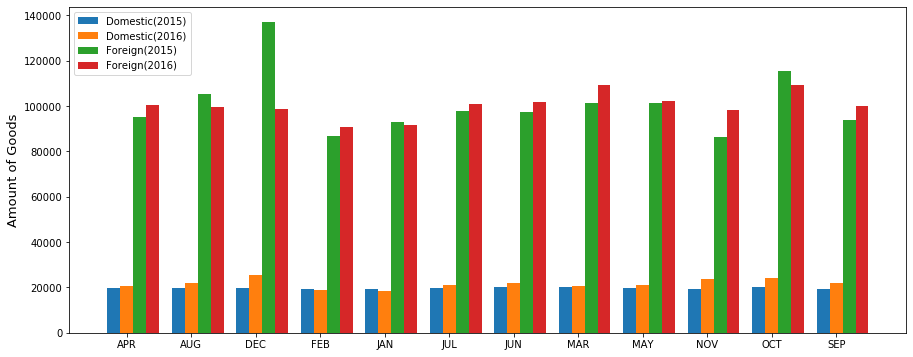

In [184]:
N = 12
ind = np.arange(N)
width = 0.2

plt.figure(figsize=(15,6))

plt.bar(ind, listYearMonthCar2015DG,width, label='Domestic(2015)')
plt.bar(ind+width, listYearMonthCar2016DG,width, label='Domestic(2016)')
plt.bar(ind+width+width, listYearMonthCar2015FG,width, label='Foreign(2015)')
plt.bar(ind+width+width+width, listYearMonthCar2016FG,width, label='Foreign(2016)')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width, months)
plt.legend()

plt.show()

## Comparison b/w Amount of Goods transported to India using Domestic type Carrier in diff months of 2015.

In [185]:
grpYearMonthCar.head(48)

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  \
YEAR MONTH CARRIER_TYPE                                               
2015 APR   DOMESTIC                 671581.0                 801798   
           FOREIGN                 1107788.0                1336322   
     AUG   DOMESTIC                 699791.0                 856586   
           FOREIGN                 1115876.0                1404132   
     DEC   DOMESTIC                 862634.0                 793462   
           FOREIGN                 1479237.0                1393534   
     FEB   DOMESTIC                 661727.0                 730524   
           FOREIGN                 1102653.0                1251744   
     JAN   DOMESTIC                 781304.0                 839616   
           FOREIGN                 1298358.0                1396445   
     JUL   DOMESTIC                 818183.0                 652932   
           FOREIGN                 1360011.0                1140516   
     JUN   DOMESTIC                 763404.0                 702237   
           FOREIGN                 1301556.0                1202246   
     MAR   DOMESTIC                 709290.0                 788060   
           FOREIGN                 1158898.0                1369976   
     MAY   DOMESTIC                 753963.0                 809880   
           FOREIGN                 1278672.0                1423896   
     NOV   DOMESTIC                 769421.0                 710425   
           FOREIGN                 1327516.0                1232771   
     OCT   DOMESTIC                 705168.0                 706600   
           FOREIGN                 1337368.0                1304937   
     SEP   DOMESTIC                 641921.0                 763676   
           FOREIGN                 1075320.0                1246641   
2016 APR   DOMESTIC                 727462.0                 880411   
           FOREIGN                 1231878.0                1494772   
     AUG   DOMESTIC                 792907.0                 929122   
           FOREIGN                 1274782.0                1494941   
     DEC   DOMESTIC                1024151.0                 911477   
           FOREIGN                 1614053.0                1472095   
     FEB   DOMESTIC                 693401.0                 775836   
           FOREIGN                 1280287.0                1347544   
     JAN   DOMESTIC                 799745.0                 870811   
           FOREIGN                 1463607.0                1551157   
     JUL   DOMESTIC                 948299.0                 773383   
           FOREIGN                 1526838.0                1308324   
     JUN   DOMESTIC                 869940.0                 697900   
           FOREIGN                 1485356.0                1264725   
     MAR   DOMESTIC                 777819.0                 839720   
           FOREIGN                 1328671.0                1486220   
     MAY   DOMESTIC                 794654.0                 884351   
           FOREIGN                 1411958.0                1553586   
     NOV   DOMESTIC                 856137.0                 809168   
           FOREIGN                 1468622.0                1385474   
     OCT   DOMESTIC                 820551.0                 801360   
           FOREIGN                 1379538.0                1293347   
     SEP   DOMESTIC                 750853.0                 878675   
           FOREIGN                 1222180.0                1418073   

                         FREIGHT TO INDIA  FREIGHT FROM INDIA  \
YEAR MONTH CARRIER_TYPE                                         
2015 APR   DOMESTIC            7681.87555         11900.11876   
           FOREIGN            37314.91400         57867.30900   
     AUG   DOMESTIC            7872.72602         12034.08820   
           FOREIGN            48950.69100         56351.48200   
     DEC   DOMESTIC            8065.28098         11901.59215   
           FOREIGN 

In [186]:
listYearMonthCar2015DGTo = grpYearMonthCar['FREIGHT TO INDIA'].take(range(0,24,2))
listYearMonthCar2015DGTo

YEAR  MONTH  CARRIER_TYPE
2015  APR    DOMESTIC        7681.87555
      AUG    DOMESTIC        7872.72602
      DEC    DOMESTIC        8065.28098
      FEB    DOMESTIC        7136.85600
      JAN    DOMESTIC        7814.50000
      JUL    DOMESTIC        7882.76554
      JUN    DOMESTIC        7521.19753
      MAR    DOMESTIC        8036.78470
      MAY    DOMESTIC        8039.74728
      NOV    DOMESTIC        7717.78445
      OCT    DOMESTIC        7855.11171
      SEP    DOMESTIC        7544.53920
Name: FREIGHT TO INDIA, dtype: float64

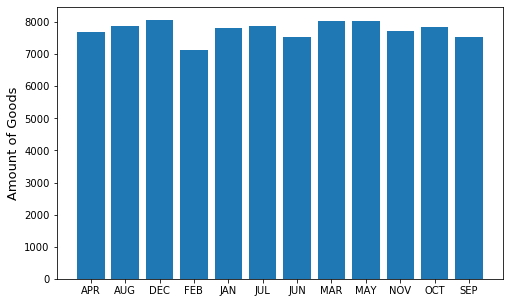

In [187]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2015DGTo)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported to India using Foreign type Carrier in diff months of 2015.

In [188]:
listYearMonthCar2015FGTo = grpYearMonthCar['FREIGHT TO INDIA'].take(range(1,24,2))
listYearMonthCar2015FGTo

YEAR  MONTH  CARRIER_TYPE
2015  APR    FOREIGN         37314.914
      AUG    FOREIGN         48950.691
      DEC    FOREIGN         38680.227
      FEB    FOREIGN         33453.973
      JAN    FOREIGN         31747.373
      JUL    FOREIGN         38887.033
      JUN    FOREIGN         37869.895
      MAR    FOREIGN         38192.069
      MAY    FOREIGN         40312.680
      NOV    FOREIGN         36240.431
      OCT    FOREIGN         46415.624
      SEP    FOREIGN         39503.193
Name: FREIGHT TO INDIA, dtype: float64

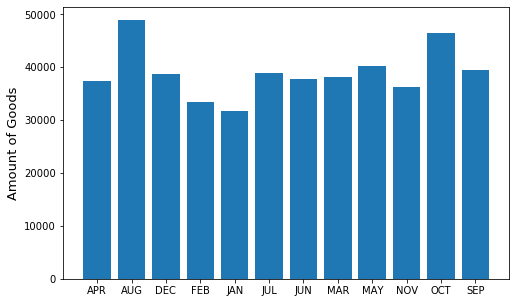

In [189]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2015FGTo)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported to India using diff Carrier Types in diff months of 2015.

In [190]:
listYearMonthCar2015DGTo

YEAR  MONTH  CARRIER_TYPE
2015  APR    DOMESTIC        7681.87555
      AUG    DOMESTIC        7872.72602
      DEC    DOMESTIC        8065.28098
      FEB    DOMESTIC        7136.85600
      JAN    DOMESTIC        7814.50000
      JUL    DOMESTIC        7882.76554
      JUN    DOMESTIC        7521.19753
      MAR    DOMESTIC        8036.78470
      MAY    DOMESTIC        8039.74728
      NOV    DOMESTIC        7717.78445
      OCT    DOMESTIC        7855.11171
      SEP    DOMESTIC        7544.53920
Name: FREIGHT TO INDIA, dtype: float64

In [191]:
listYearMonthCar2015FGTo

YEAR  MONTH  CARRIER_TYPE
2015  APR    FOREIGN         37314.914
      AUG    FOREIGN         48950.691
      DEC    FOREIGN         38680.227
      FEB    FOREIGN         33453.973
      JAN    FOREIGN         31747.373
      JUL    FOREIGN         38887.033
      JUN    FOREIGN         37869.895
      MAR    FOREIGN         38192.069
      MAY    FOREIGN         40312.680
      NOV    FOREIGN         36240.431
      OCT    FOREIGN         46415.624
      SEP    FOREIGN         39503.193
Name: FREIGHT TO INDIA, dtype: float64

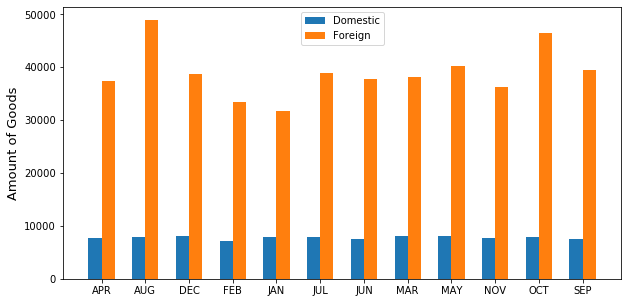

In [192]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonthCar2015DGTo,width, label='Domestic')
plt.bar(ind+width, listYearMonthCar2015FGTo,width, label='Foreign')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width / 2, months)
plt.legend()

plt.show()

## Comparison b/w Amount of Goods transported to India using Domestic type Carrier in diff months of 2016.

In [193]:
grpYearMonthCar.head(48)

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  \
YEAR MONTH CARRIER_TYPE                                               
2015 APR   DOMESTIC                 671581.0                 801798   
           FOREIGN                 1107788.0                1336322   
     AUG   DOMESTIC                 699791.0                 856586   
           FOREIGN                 1115876.0                1404132   
     DEC   DOMESTIC                 862634.0                 793462   
           FOREIGN                 1479237.0                1393534   
     FEB   DOMESTIC                 661727.0                 730524   
           FOREIGN                 1102653.0                1251744   
     JAN   DOMESTIC                 781304.0                 839616   
           FOREIGN                 1298358.0                1396445   
     JUL   DOMESTIC                 818183.0                 652932   
           FOREIGN                 1360011.0                1140516   
     JUN   DOMESTIC                 763404.0                 702237   
           FOREIGN                 1301556.0                1202246   
     MAR   DOMESTIC                 709290.0                 788060   
           FOREIGN                 1158898.0                1369976   
     MAY   DOMESTIC                 753963.0                 809880   
           FOREIGN                 1278672.0                1423896   
     NOV   DOMESTIC                 769421.0                 710425   
           FOREIGN                 1327516.0                1232771   
     OCT   DOMESTIC                 705168.0                 706600   
           FOREIGN                 1337368.0                1304937   
     SEP   DOMESTIC                 641921.0                 763676   
           FOREIGN                 1075320.0                1246641   
2016 APR   DOMESTIC                 727462.0                 880411   
           FOREIGN                 1231878.0                1494772   
     AUG   DOMESTIC                 792907.0                 929122   
           FOREIGN                 1274782.0                1494941   
     DEC   DOMESTIC                1024151.0                 911477   
           FOREIGN                 1614053.0                1472095   
     FEB   DOMESTIC                 693401.0                 775836   
           FOREIGN                 1280287.0                1347544   
     JAN   DOMESTIC                 799745.0                 870811   
           FOREIGN                 1463607.0                1551157   
     JUL   DOMESTIC                 948299.0                 773383   
           FOREIGN                 1526838.0                1308324   
     JUN   DOMESTIC                 869940.0                 697900   
           FOREIGN                 1485356.0                1264725   
     MAR   DOMESTIC                 777819.0                 839720   
           FOREIGN                 1328671.0                1486220   
     MAY   DOMESTIC                 794654.0                 884351   
           FOREIGN                 1411958.0                1553586   
     NOV   DOMESTIC                 856137.0                 809168   
           FOREIGN                 1468622.0                1385474   
     OCT   DOMESTIC                 820551.0                 801360   
           FOREIGN                 1379538.0                1293347   
     SEP   DOMESTIC                 750853.0                 878675   
           FOREIGN                 1222180.0                1418073   

                         FREIGHT TO INDIA  FREIGHT FROM INDIA  \
YEAR MONTH CARRIER_TYPE                                         
2015 APR   DOMESTIC            7681.87555         11900.11876   
           FOREIGN            37314.91400         57867.30900   
     AUG   DOMESTIC            7872.72602         12034.08820   
           FOREIGN            48950.69100         56351.48200   
     DEC   DOMESTIC            8065.28098         11901.59215   
           FOREIGN 

In [194]:
listYearMonthCar2016DGTo = grpYearMonthCar['FREIGHT TO INDIA'].take(range(24,48,2))
listYearMonthCar2016DGTo

YEAR  MONTH  CARRIER_TYPE
2016  APR    DOMESTIC         7823.6
      AUG    DOMESTIC         8291.5
      DEC    DOMESTIC        10309.0
      FEB    DOMESTIC         7177.8
      JAN    DOMESTIC         7303.2
      JUL    DOMESTIC         8090.1
      JUN    DOMESTIC         7710.0
      MAR    DOMESTIC         8040.8
      MAY    DOMESTIC         7629.0
      NOV    DOMESTIC         9553.4
      OCT    DOMESTIC         9323.5
      SEP    DOMESTIC         8579.7
Name: FREIGHT TO INDIA, dtype: float64

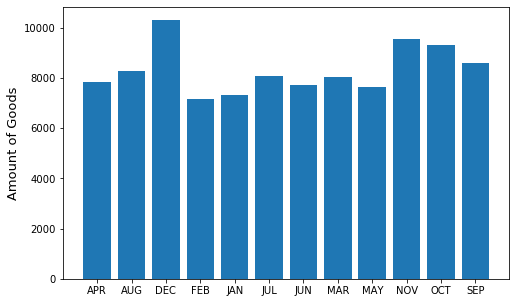

In [195]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2016DGTo)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported to India using Foreign type Carrier in diff months of 2016.

In [196]:
listYearMonthCar2016FGTo = grpYearMonthCar['FREIGHT TO INDIA'].take(range(25,48,2))
listYearMonthCar2016FGTo

YEAR  MONTH  CARRIER_TYPE
2016  APR    FOREIGN         38098.4
      AUG    FOREIGN         39127.6
      DEC    FOREIGN         40813.3
      FEB    FOREIGN         33911.4
      JAN    FOREIGN         36462.4
      JUL    FOREIGN         40382.9
      JUN    FOREIGN         37351.7
      MAR    FOREIGN         41330.5
      MAY    FOREIGN         38561.4
      NOV    FOREIGN         40411.4
      OCT    FOREIGN         43073.4
      SEP    FOREIGN         41162.7
Name: FREIGHT TO INDIA, dtype: float64

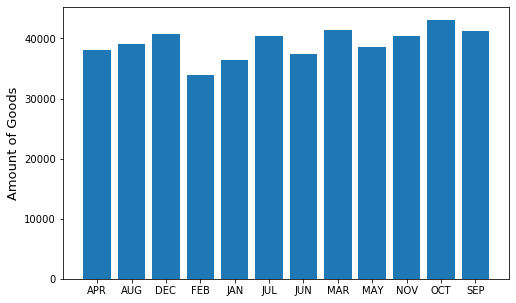

In [197]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2016FGTo)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported to India using diff Carrier Types in diff months of 2016.

In [198]:
listYearMonthCar2016DGTo

YEAR  MONTH  CARRIER_TYPE
2016  APR    DOMESTIC         7823.6
      AUG    DOMESTIC         8291.5
      DEC    DOMESTIC        10309.0
      FEB    DOMESTIC         7177.8
      JAN    DOMESTIC         7303.2
      JUL    DOMESTIC         8090.1
      JUN    DOMESTIC         7710.0
      MAR    DOMESTIC         8040.8
      MAY    DOMESTIC         7629.0
      NOV    DOMESTIC         9553.4
      OCT    DOMESTIC         9323.5
      SEP    DOMESTIC         8579.7
Name: FREIGHT TO INDIA, dtype: float64

In [199]:
listYearMonthCar2016FGTo

YEAR  MONTH  CARRIER_TYPE
2016  APR    FOREIGN         38098.4
      AUG    FOREIGN         39127.6
      DEC    FOREIGN         40813.3
      FEB    FOREIGN         33911.4
      JAN    FOREIGN         36462.4
      JUL    FOREIGN         40382.9
      JUN    FOREIGN         37351.7
      MAR    FOREIGN         41330.5
      MAY    FOREIGN         38561.4
      NOV    FOREIGN         40411.4
      OCT    FOREIGN         43073.4
      SEP    FOREIGN         41162.7
Name: FREIGHT TO INDIA, dtype: float64

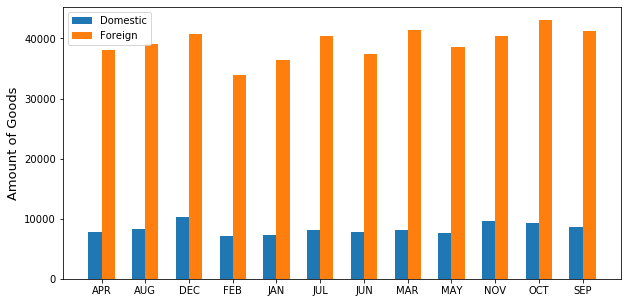

In [200]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonthCar2016DGTo,width, label='Domestic')
plt.bar(ind+width, listYearMonthCar2016FGTo,width, label='Foreign')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width / 2, months)
plt.legend()

plt.show()

## Comparison b/w Amount of Goods transported to india using diff Carrier Types in diff months of 2015 & 2016.

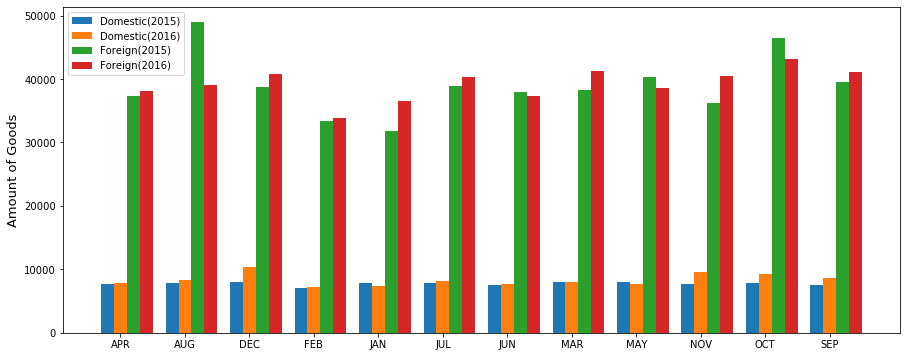

In [201]:
N = 12
ind = np.arange(N)
width = 0.2

plt.figure(figsize=(15,6))

plt.bar(ind, listYearMonthCar2015DGTo,width, label='Domestic(2015)')
plt.bar(ind+width, listYearMonthCar2016DGTo,width, label='Domestic(2016)')
plt.bar(ind+width+width, listYearMonthCar2015FGTo,width, label='Foreign(2015)')
plt.bar(ind+width+width+width, listYearMonthCar2016FGTo,width, label='Foreign(2016)')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width, months)
plt.legend()

plt.show()

## Comparison b/w Amount of Goods transported from India using Domestic type Carrier in diff months of 2015.

In [202]:
grpYearMonthCar.head(48)

PASSENGERS_TO_INDIA  PASSENGERS_FROM_INDIA  \
YEAR MONTH CARRIER_TYPE                                               
2015 APR   DOMESTIC                 671581.0                 801798   
           FOREIGN                 1107788.0                1336322   
     AUG   DOMESTIC                 699791.0                 856586   
           FOREIGN                 1115876.0                1404132   
     DEC   DOMESTIC                 862634.0                 793462   
           FOREIGN                 1479237.0                1393534   
     FEB   DOMESTIC                 661727.0                 730524   
           FOREIGN                 1102653.0                1251744   
     JAN   DOMESTIC                 781304.0                 839616   
           FOREIGN                 1298358.0                1396445   
     JUL   DOMESTIC                 818183.0                 652932   
           FOREIGN                 1360011.0                1140516   
     JUN   DOMESTIC                 763404.0                 702237   
           FOREIGN                 1301556.0                1202246   
     MAR   DOMESTIC                 709290.0                 788060   
           FOREIGN                 1158898.0                1369976   
     MAY   DOMESTIC                 753963.0                 809880   
           FOREIGN                 1278672.0                1423896   
     NOV   DOMESTIC                 769421.0                 710425   
           FOREIGN                 1327516.0                1232771   
     OCT   DOMESTIC                 705168.0                 706600   
           FOREIGN                 1337368.0                1304937   
     SEP   DOMESTIC                 641921.0                 763676   
           FOREIGN                 1075320.0                1246641   
2016 APR   DOMESTIC                 727462.0                 880411   
           FOREIGN                 1231878.0                1494772   
     AUG   DOMESTIC                 792907.0                 929122   
           FOREIGN                 1274782.0                1494941   
     DEC   DOMESTIC                1024151.0                 911477   
           FOREIGN                 1614053.0                1472095   
     FEB   DOMESTIC                 693401.0                 775836   
           FOREIGN                 1280287.0                1347544   
     JAN   DOMESTIC                 799745.0                 870811   
           FOREIGN                 1463607.0                1551157   
     JUL   DOMESTIC                 948299.0                 773383   
           FOREIGN                 1526838.0                1308324   
     JUN   DOMESTIC                 869940.0                 697900   
           FOREIGN                 1485356.0                1264725   
     MAR   DOMESTIC                 777819.0                 839720   
           FOREIGN                 1328671.0                1486220   
     MAY   DOMESTIC                 794654.0                 884351   
           FOREIGN                 1411958.0                1553586   
     NOV   DOMESTIC                 856137.0                 809168   
           FOREIGN                 1468622.0                1385474   
     OCT   DOMESTIC                 820551.0                 801360   
           FOREIGN                 1379538.0                1293347   
     SEP   DOMESTIC                 750853.0                 878675   
           FOREIGN                 1222180.0                1418073   

                         FREIGHT TO INDIA  FREIGHT FROM INDIA  \
YEAR MONTH CARRIER_TYPE                                         
2015 APR   DOMESTIC            7681.87555         11900.11876   
           FOREIGN            37314.91400         57867.30900   
     AUG   DOMESTIC            7872.72602         12034.08820   
           FOREIGN            48950.69100         56351.48200   
     DEC   DOMESTIC            8065.28098         11901.59215   
           FOREIGN 

In [203]:
listYearMonthCar2015DGFrom = grpYearMonthCar['FREIGHT FROM INDIA'].take(range(0,24,2))
listYearMonthCar2015DGFrom

YEAR  MONTH  CARRIER_TYPE
2015  APR    DOMESTIC        11900.11876
      AUG    DOMESTIC        12034.08820
      DEC    DOMESTIC        11901.59215
      FEB    DOMESTIC        12108.29400
      JAN    DOMESTIC        11497.49700
      JUL    DOMESTIC        12079.18352
      JUN    DOMESTIC        12605.72837
      MAR    DOMESTIC        12292.33650
      MAY    DOMESTIC        11785.20229
      NOV    DOMESTIC        11679.52738
      OCT    DOMESTIC        12485.44573
      SEP    DOMESTIC        11635.29140
Name: FREIGHT FROM INDIA, dtype: float64

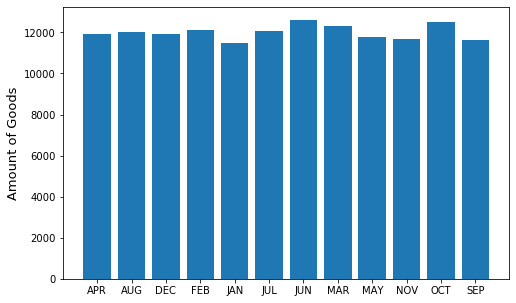

In [204]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2015DGFrom)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported from India using Foreign type Carrier in diff months of 2015.

In [205]:
listYearMonthCar2015FGFrom = grpYearMonthCar['FREIGHT FROM INDIA'].take(range(1,24,2))
listYearMonthCar2015FGFrom

YEAR  MONTH  CARRIER_TYPE
2015  APR    FOREIGN         57867.309
      AUG    FOREIGN         56351.482
      DEC    FOREIGN         98350.880
      FEB    FOREIGN         53370.129
      JAN    FOREIGN         61265.682
      JUL    FOREIGN         59008.450
      JUN    FOREIGN         59346.466
      MAR    FOREIGN         63228.609
      MAY    FOREIGN         61209.104
      NOV    FOREIGN         50345.531
      OCT    FOREIGN         69117.677
      SEP    FOREIGN         54309.792
Name: FREIGHT FROM INDIA, dtype: float64

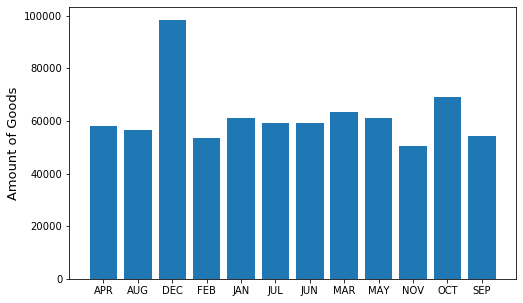

In [206]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2015FGFrom)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported from India using diff Carrier Types in diff months of 2015.

In [207]:
listYearMonthCar2015DGFrom

YEAR  MONTH  CARRIER_TYPE
2015  APR    DOMESTIC        11900.11876
      AUG    DOMESTIC        12034.08820
      DEC    DOMESTIC        11901.59215
      FEB    DOMESTIC        12108.29400
      JAN    DOMESTIC        11497.49700
      JUL    DOMESTIC        12079.18352
      JUN    DOMESTIC        12605.72837
      MAR    DOMESTIC        12292.33650
      MAY    DOMESTIC        11785.20229
      NOV    DOMESTIC        11679.52738
      OCT    DOMESTIC        12485.44573
      SEP    DOMESTIC        11635.29140
Name: FREIGHT FROM INDIA, dtype: float64

In [208]:
listYearMonthCar2015FGFrom

YEAR  MONTH  CARRIER_TYPE
2015  APR    FOREIGN         57867.309
      AUG    FOREIGN         56351.482
      DEC    FOREIGN         98350.880
      FEB    FOREIGN         53370.129
      JAN    FOREIGN         61265.682
      JUL    FOREIGN         59008.450
      JUN    FOREIGN         59346.466
      MAR    FOREIGN         63228.609
      MAY    FOREIGN         61209.104
      NOV    FOREIGN         50345.531
      OCT    FOREIGN         69117.677
      SEP    FOREIGN         54309.792
Name: FREIGHT FROM INDIA, dtype: float64

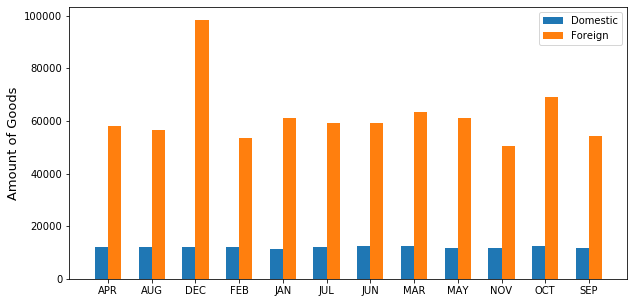

In [209]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonthCar2015DGFrom,width, label='Domestic')
plt.bar(ind+width, listYearMonthCar2015FGFrom,width, label='Foreign')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width / 2, months)
plt.legend()

plt.show()

## Comparison b/w Amount of Goods transported from India using Domestic type Carrier in diff months of 2016.

In [210]:
listYearMonthCar2016DGFrom = grpYearMonthCar['FREIGHT FROM INDIA'].take(range(24,48,2))
listYearMonthCar2016DGFrom

YEAR  MONTH  CARRIER_TYPE
2016  APR    DOMESTIC        12773.4
      AUG    DOMESTIC        13595.1
      DEC    DOMESTIC        15227.2
      FEB    DOMESTIC        11869.1
      JAN    DOMESTIC        11310.4
      JUL    DOMESTIC        12843.4
      JUN    DOMESTIC        14231.8
      MAR    DOMESTIC        12576.0
      MAY    DOMESTIC        13618.2
      NOV    DOMESTIC        14237.3
      OCT    DOMESTIC        14867.9
      SEP    DOMESTIC        13580.8
Name: FREIGHT FROM INDIA, dtype: float64

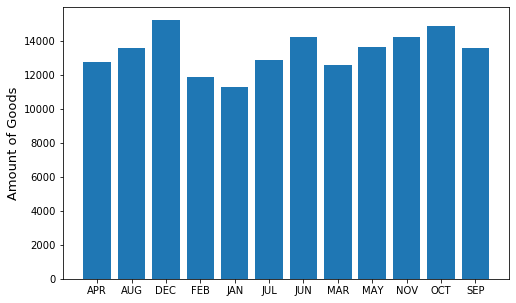

In [211]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2016DGFrom)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported from India using Foreign type Carrier in diff months of 2016.

In [212]:
listYearMonthCar2016FGFrom = grpYearMonthCar['FREIGHT FROM INDIA'].take(range(25,48,2))
listYearMonthCar2016FGFrom

YEAR  MONTH  CARRIER_TYPE
2016  APR    FOREIGN         62445.1
      AUG    FOREIGN         60312.3
      DEC    FOREIGN         58129.2
      FEB    FOREIGN         57069.3
      JAN    FOREIGN         55082.2
      JUL    FOREIGN         60425.2
      JUN    FOREIGN         64473.9
      MAR    FOREIGN         67929.3
      MAY    FOREIGN         63894.2
      NOV    FOREIGN         57713.4
      OCT    FOREIGN         66078.2
      SEP    FOREIGN         58919.3
Name: FREIGHT FROM INDIA, dtype: float64

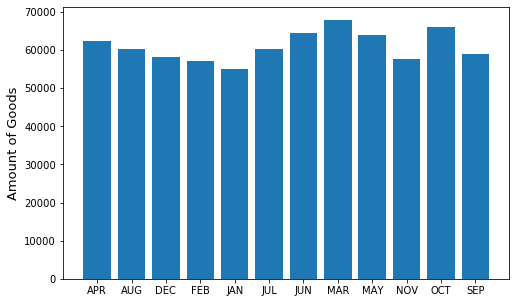

In [213]:
plt.figure(figsize=(8,5))

plt.bar(months, listYearMonthCar2016FGFrom)

plt.ylabel("Amount of Goods", size=13)

plt.show()

## Comparison b/w Amount of Goods transported from India using diff Carrier Types in diff months of 2016.

In [214]:
listYearMonthCar2016DGFrom

YEAR  MONTH  CARRIER_TYPE
2016  APR    DOMESTIC        12773.4
      AUG    DOMESTIC        13595.1
      DEC    DOMESTIC        15227.2
      FEB    DOMESTIC        11869.1
      JAN    DOMESTIC        11310.4
      JUL    DOMESTIC        12843.4
      JUN    DOMESTIC        14231.8
      MAR    DOMESTIC        12576.0
      MAY    DOMESTIC        13618.2
      NOV    DOMESTIC        14237.3
      OCT    DOMESTIC        14867.9
      SEP    DOMESTIC        13580.8
Name: FREIGHT FROM INDIA, dtype: float64

In [215]:
listYearMonthCar2016FGFrom

YEAR  MONTH  CARRIER_TYPE
2016  APR    FOREIGN         62445.1
      AUG    FOREIGN         60312.3
      DEC    FOREIGN         58129.2
      FEB    FOREIGN         57069.3
      JAN    FOREIGN         55082.2
      JUL    FOREIGN         60425.2
      JUN    FOREIGN         64473.9
      MAR    FOREIGN         67929.3
      MAY    FOREIGN         63894.2
      NOV    FOREIGN         57713.4
      OCT    FOREIGN         66078.2
      SEP    FOREIGN         58919.3
Name: FREIGHT FROM INDIA, dtype: float64

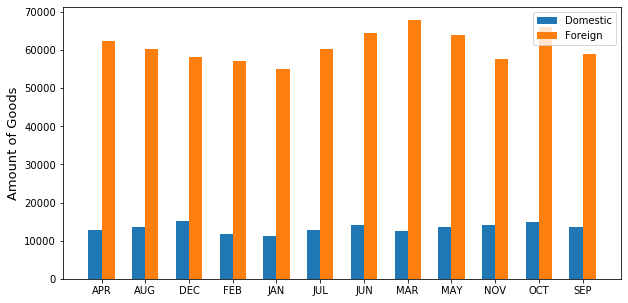

In [216]:
N = 12
ind = np.arange(N)
width = 0.3

plt.figure(figsize=(10,5))

plt.bar(ind, listYearMonthCar2016DGFrom,width, label='Domestic')
plt.bar(ind+width, listYearMonthCar2016FGFrom,width, label='Foreign')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width / 2, months)
plt.legend()

plt.show()

## Comparison b/w Amount of Goods transported from India using diff Carrier Types in diff months of 2015 & 2016.

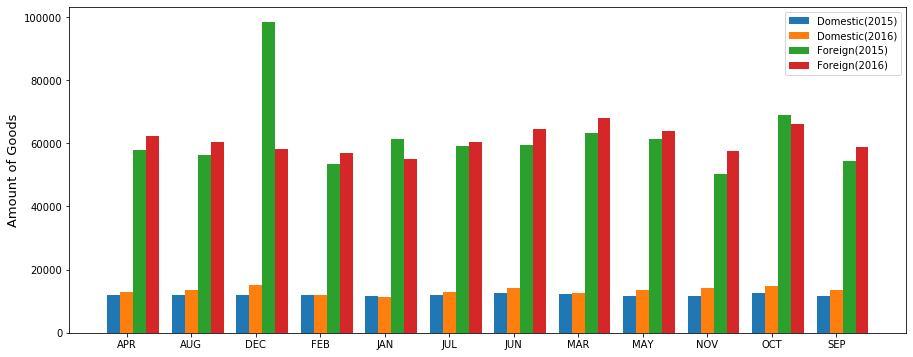

In [217]:
N = 12
ind = np.arange(N)
width = 0.2

plt.figure(figsize=(15,6))

plt.bar(ind, listYearMonthCar2015DGFrom,width, label='Domestic(2015)')
plt.bar(ind+width, listYearMonthCar2016DGFrom,width, label='Domestic(2016)')
plt.bar(ind+width+width, listYearMonthCar2015FGFrom,width, label='Foreign(2015)')
plt.bar(ind+width+width+width, listYearMonthCar2016FGFrom,width, label='Foreign(2016)')

plt.ylabel("Amount of Goods", size=13)

plt.xticks(ind + width, months)
plt.legend()

plt.show()

## Thank You!